# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [96]:
# Import warnings
import warnings as wr


In [97]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [98]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [99]:
# # Try loading one file

# df = pd.read_parquet('C:/Users/Balaji/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
# print(df.info())
# print("size of the data is ",df.shape)
# df.tail()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [100]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()


# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:

        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        currentFileData = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        currentFileData['timestamp']=pd.to_datetime(currentFileData['tpep_pickup_datetime'])

        # Get the unique dates in the data
        unique_dates = currentFileData['timestamp'].dt.date.unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:

            # Iterate through each hour of the selected date
             for hour in range(24) : # Looping through 0 to 23 hours as a day can have only 24 hours and in for loop index starts with 0 and doesnt consider 24
                 hourly_data = currentFileData[(currentFileData['timestamp'].dt.date == date) & (currentFileData['timestamp'].dt.hour == hour)]

                # Sample 5% of the hourly data randomly

                 if not hourly_data.empty:
                    sample=hourly_data.sample(frac=0.05, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])
                    print("Sample data concatinated for hour",hour)
                    # Concatenate the sampled data of all the dates to a single dataframe
        print("File 1 completed")
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
      print(f"Error reading file {file_name}: {e}")

print(df.head())

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [103]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/dataForAnalysis')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [104]:
dataAfterSampling = pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/dataForAnalysis')

fewRecords=pd.DataFrame()

fewRecords=dataAfterSampling.sample(300000,random_state=42)


In [105]:
# loading 3 lakh records to a new file
fewRecords.to_parquet('YellowCabsNYCThreeLakhRecs')


In [106]:
# Read file and store the data as dataframe
df=pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/YellowCabsNYCThreeLakhRecs')

In [107]:
#view few records to see the data
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2702575         2  2023-06-25 22:34:24   2023-06-25 22:59:09              2.0   
815363          2  2023-09-09 14:47:50   2023-09-09 15:31:17              1.0   
1329328         2  2023-10-13 16:46:26   2023-10-13 16:59:05              1.0   
723661          1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
847078          2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2702575           5.53         1.0                  N           158   
815363           18.11         2.0                  N           132   
1329328           1.54         1.0                  N           140   
723661            1.80         1.0                  N           239   
847078            2.61         1.0                  N           186   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
2702575            40             1  ...    1.0      0.5        8.37   
815363            107             2  ...    0.0      0.5        0.00   
1329328           142             1  ...    2.5      0.5        3.72   
723661             75             1  ...    2.5      0.5        4.60   
847078            113             1  ...    0.0      0.5        4.34   

         tolls_amount  improvement_surcharge  total_amount  \
2702575          6.55                    1.0         50.22   
815363           6.94                    1.0         82.69   
1329328          0.00                    1.0         22.32   
723661           0.00                    1.0         20.00   
847078           0.00                    1.0         26.04   

         congestion_surcharge  Airport_fee           timestamp airport_fee  
2702575                   2.5         0.00 2023-06-25 22:34:24         NaN  
815363                    2.5         1.75 2023-09-09 14:47:50         NaN  
1329328                   2.5         0.00 2023-10-13 16:46:26         NaN  
723661                    2.5         0.00 2023-07-10 12:08:14         NaN  
847078                    2.5         0.00 2023-11-08 15:38:53         NaN  

[5 rows x 21 columns]

In [108]:
# df.info()
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2702575 to 2917478
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289746 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289746 non-null  float64       
 6   store_and_fwd_flag     289746 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [109]:
# Fix the index and drop any columns that are not needed
#Reset Index
df.reset_index(drop=True,inplace=True)

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-06-25 22:34:24   2023-06-25 22:59:09              2.0   
1         2  2023-09-09 14:47:50   2023-09-09 15:31:17              1.0   
2         2  2023-10-13 16:46:26   2023-10-13 16:59:05              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           5.53         1.0                  N           158            40   
1          18.11         2.0                  N           132           107   
2           1.54         1.0                  N           140           142   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        8.37          6.55   
1             2  ...    0.0      0.5        0.00          6.94   
2             1  ...    2.5      0.5        3.72          0.00   
3             1  ...    2.5      0.5        4.60          0.00   
4             1  ...    0.0      0.5        4.34          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         50.22                   2.5         0.00   
1                    1.0         82.69                   2.5         1.75   
2                    1.0         22.32                   2.5         0.00   
3                    1.0         20.00                   2.5         0.00   
4                    1.0         26.04                   2.5         0.00   

            timestamp airport_fee  
0 2023-06-25 22:34:24         NaN  
1 2023-09-09 14:47:50         NaN  
2 2023-10-13 16:46:26         NaN  
3 2023-07-10 12:08:14         NaN  
4 2023-11-08 15:38:53         NaN  

[5 rows x 21 columns]

In [110]:
df.head()
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
299995         2  2023-06-23 13:21:45   2023-06-23 13:36:03              1.0   
299996         2  2023-12-05 19:59:07   2023-12-05 20:05:47              1.0   
299997         2  2023-03-16 09:09:10   2023-03-16 09:25:03              2.0   
299998         2  2023-06-04 17:53:29   2023-06-04 18:07:31              1.0   
299999         2  2023-01-31 10:04:40   2023-01-31 10:11:38              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
299995           1.00         1.0                  N           246   
299996           1.28         1.0                  N            68   
299997           2.69         1.0                  N           237   
299998           2.46         1.0                  N           229   
299999           0.63         1.0                  N           164   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
299995            48             1  ...    0.0      0.5        4.00   
299996           246             1  ...    2.5      0.5        2.00   
299997           234             2  ...    0.0      0.5        0.00   
299998           263             1  ...    0.0      0.5        5.00   
299999           161             1  ...    0.0      0.5        2.38   

        tolls_amount  improvement_surcharge  total_amount  \
299995           0.0                    1.0         21.50   
299996           0.0                    1.0         17.80   
299997           0.0                    1.0         21.00   
299998           0.0                    1.0         24.60   
299999           0.0                    1.0         14.28   

        congestion_surcharge  Airport_fee           timestamp airport_fee  
299995                   2.5          0.0 2023-06-23 13:21:45         NaN  
299996                   2.5          0.0 2023-12-05 19:59:07         NaN  
299997                   2.5          0.0 2023-03-16 09:09:10         NaN  
299998                   2.5          0.0 2023-06-04 17:53:29         NaN  
299999                   2.5          NaN 2023-01-31 10:04:40         0.0  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [111]:
# Combine the two airport fee columns
df['Airport_fee']=df.Airport_fee.fillna(df.airport_fee)
df.drop('airport_fee',axis=1,inplace=True) # dropped airport_fee after merging with Airport_fee as the column has mostly null values

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [112]:
# check where values of fare amount are negative -- I didnt find any negative amount for fare amount but I found in total_amount , airport fee and congestion charge
(df.fare_amount<0).sum() # returns 0 values np.int64(0)
(df.total_amount<0).sum() #returns 9 records np.int64(13)
df[df.total_amount<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14296          2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
48075          2  2023-11-11 18:50:47   2023-11-11 19:40:33              4.0   
66010          2  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   
70515          2  2023-03-13 11:40:22   2023-03-13 11:51:53              1.0   
72012          2  2023-01-25 11:10:37   2023-01-25 11:11:02              1.0   
128079         2  2023-10-06 16:38:25   2023-10-06 16:39:09              2.0   
139063         2  2023-08-16 14:37:18   2023-08-16 14:37:38              2.0   
184046         2  2023-05-14 23:47:22   2023-05-14 23:57:43              6.0   
240442         2  2023-10-08 19:17:28   2023-10-08 19:20:11              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
14296            0.00         2.0                  N           132   
48075           20.06         2.0                  N           132   
66010            0.00         2.0                  N            74   
70515            3.49         1.0                  N           138   
72012            0.02         2.0                  N           170   
128079           0.01         2.0                  N           107   
139063           0.00         2.0                  N           142   
184046           3.66         1.0                  N           170   
240442           0.53         1.0                  N           237   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
14296            132             2          0.0    0.0     -0.5         0.0   
48075            151             2          0.0    0.0     -0.5         0.0   
66010             74             2          0.0    0.0     -0.5         0.0   
70515            253             2          0.0    0.0     -0.5         0.0   
72012            233             2          0.0    0.0     -0.5         0.0   
128079           107             2          0.0    0.0     -0.5         0.0   
139063           142             2          0.0    0.0     -0.5         0.0   
184046           263             2          0.0    0.0     -0.5         0.0   
240442           237             2          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
14296            0.0                   -1.0         -5.25   
48075            0.0                   -1.0         -3.25   
66010            0.0                   -1.0         -1.50   
70515            0.0                   -1.0         -2.75   
72012            0.0                   -1.0         -4.00   
128079           0.0                   -1.0         -4.00   
139063           0.0                   -1.0         -4.00   
184046           0.0                   -1.0         -4.00   
240442           0.0                   -1.0         -4.00   

        congestion_surcharge  Airport_fee           timestamp  
14296                   -2.5        -1.25 2023-01-03 14:24:45  
48075                    0.0        -1.75 2023-11-11 18:50:47  
66010                    0.0         0.00 2023-09-02 18:29:48  
70515                    0.0        -1.25 2023-03-13 11:40:22  
72012                   -2.5         0.00 2023-01-25 11:10:37  
128079                  -2.5         0.00 2023-10-06 16:38:25  
139063                  -2.5         0.00 2023-08-16 14:37:18  
184046                  -2.5         0.00 2023-05-14 23:47:22  
240442                  -2.5         0.00 2023-10-08 19:17:28

Did you notice something different in the `RatecodeID` column for above records?

In [113]:
# Analyse RatecodeID for the negative fare amounts

# The sample data that I got doesnt have any negative fare amounts


In [114]:
# Find which columns have negative values
columns_10_to_19 = df.iloc[:, 10:19] # excluding date time related columns

# Check for negative values in these columns
negative_columns = [col for col in columns_10_to_19.columns if (columns_10_to_19[col] < 0).any()]

print("Columns with negative values:", negative_columns)# ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'] these are in negative values


Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [115]:
# fix these negative values
df.iloc[:, 10:19]=columns_10_to_19.abs()
df[(df.Airport_fee<0)] #--Verified for all columns, no -ve values present now

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, timestamp]
Index: []

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [116]:
# Find the proportion of missing values in each column
df.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10254
trip_distance                0
RatecodeID               10254
store_and_fwd_flag       10254
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10254
Airport_fee              10254
timestamp                    0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [117]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
#cleaned data by removing null values on passenger_count ,if the passengers are null then the ride would have not hapened
df.dropna(subset=['passenger_count'],inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [118]:
(df.passenger_count==0).sum()
analysisDf=df[df['passenger_count']!=0]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [119]:

df.RatecodeID.isnull().sum()
# Fix missing values in 'RatecodeID'
df.dropna(subset=['RatecodeID'],inplace=True)  #Dropping null values for rate code

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [120]:
df.RatecodeID.isnull().sum()
# handle null values in congestion_surcharge
df.dropna(subset=['congestion_surcharge'],inplace=True)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [121]:
# Handle any remaining missing values
df.isnull().sum() # All columns have zero missing values

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
timestamp                0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [122]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  289746.000000                      289746                      289746   
mean        1.736183  2023-07-01 20:05:08.638503  2023-07-01 20:22:32.344946   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:13:27   
25%         1.000000  2023-04-01 19:39:40.500000         2023-04-01 19:49:34   
50%         2.000000         2023-06-25 19:43:01         2023-06-25 20:01:11   
75%         2.000000  2023-10-05 21:39:03.750000  2023-10-05 21:56:53.500000   
max         2.000000         2023-12-31 23:57:12         2024-01-01 20:14:57   
std         0.440702                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID  PULocationID  \
count    289746.000000  289746.000000  289746.000000  289746.00000   
mean          1.368147       3.500618       1.632747     165.42666   
min           0.000000       0.000000       1.000000       1.00000   
25%           1.000000       1.050000       1.000000     132.00000   
50%           1.000000       1.785000       1.000000     162.00000   
75%           1.000000       3.380000       1.000000     234.00000   
max           9.000000    9673.760000      99.000000     265.00000   
std           0.889911      21.949361       7.390066      63.71468   

        DOLocationID   payment_type    fare_amount          extra  \
count  289746.000000  289746.000000  289746.000000  289746.000000   
mean      164.496352       1.203778      19.732654       1.640555   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000    1375.000000      13.750000   
std        69.762038       0.464517      18.416679       1.838810   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  289746.000000  289746.000000  289746.000000          289746.000000   
mean        0.495360       3.576572       0.595312               0.999290   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         0.800000     170.000000      76.000000               1.000000   
std         0.048056       4.024862       2.175516               0.024789   

        total_amount  congestion_surcharge    Airport_fee  \
count  289746.000000         289746.000000  289746.000000   
mean       28.860601              2.307901       0.143055   
min         0.000000              0.000000       0.000000   
25%        15.960000              2.500000       0.000000   
50%        21.000000              2.500000       0.000000   
75%        30.700000              2.500000       0.000000   
max      1435.190000              2.500000       1.750000   
std        23.003019              0.665844       0.465111   

                        timestamp  
count                      289746  
mean   2023-07-01 20:05:08.638503  
min           2023-01-01 00:04:34  
25%    2023-04-01 19:39:40.500000  
50%           2023-06-25 19:43:01  
75%    2023-10-05 21:39:03.750000  
max           2023-12-31 23:57:12  
std                           NaN

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [123]:
# remove passenger_count > 6  -- found 3 records removing it
(df.passenger_count>6).sum()
df=df[~(df.passenger_count>6)]

df.passenger_count.describe()

count    289743.000000
mean          1.368074
std           0.889628
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64

In [124]:
# Continue with outlier handling
df.fare_amount.describe()
((df.trip_distance<=0.1)&(df.fare_amount)>300).sum() # No records found

np.int64(0)

In [125]:
#There are few records where pick up and drop locations are different but fare amount and trip distance are 0. So dropping those
df=df[~((df.trip_distance==0)& (df.fare_amount==0) & (df.PULocationID!=df.DOLocationID))]


In [126]:
(df.trip_distance>250).sum() # found 3 records -- np.int64(3)
df=df[~(df.trip_distance>250)]

In [127]:
(df.payment_type==0).sum() # didnt find any such payment type code np.int64(0)

np.int64(0)

In [128]:
# Do any columns need standardising?
df.columns
#Passenger count  cannot be in float 2.5,3.5 or 1.5 so it can be int64
df.passenger_count=df.passenger_count.astype('int64')
#Rate Code  cannot be in float as per the provided document rate codes are raning from 1 to 6 so,it can also be converted to int type
df.RatecodeID=df.RatecodeID.astype('int64')

#column names are not in same pattern, few columns starts with lower case and few coumns starts with Uper case. so, changing it.
df.columns = [col.title() for col in df.columns]

df=df.rename(columns={'Vendorid':'Vendor_Id','Ratecodeid':'Rate_Code_Id','Pulocationid':'Pu_Location_Id','Dolocationid':'Do_Location_Id'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289733 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Vendor_Id              289733 non-null  int64         
 1   Tpep_Pickup_Datetime   289733 non-null  datetime64[us]
 2   Tpep_Dropoff_Datetime  289733 non-null  datetime64[us]
 3   Passenger_Count        289733 non-null  int64         
 4   Trip_Distance          289733 non-null  float64       
 5   Rate_Code_Id           289733 non-null  int64         
 6   Store_And_Fwd_Flag     289733 non-null  object        
 7   Pu_Location_Id         289733 non-null  int64         
 8   Do_Location_Id         289733 non-null  int64         
 9   Payment_Type           289733 non-null  int64         
 10  Fare_Amount            289733 non-null  float64       
 11  Extra                  289733 non-null  float64       
 12  Mta_Tax                289733 non-null  float64  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [129]:
df.columns.tolist()

['Vendor_Id',
 'Tpep_Pickup_Datetime',
 'Tpep_Dropoff_Datetime',
 'Passenger_Count',
 'Trip_Distance',
 'Rate_Code_Id',
 'Store_And_Fwd_Flag',
 'Pu_Location_Id',
 'Do_Location_Id',
 'Payment_Type',
 'Fare_Amount',
 'Extra',
 'Mta_Tax',
 'Tip_Amount',
 'Tolls_Amount',
 'Improvement_Surcharge',
 'Total_Amount',
 'Congestion_Surcharge',
 'Airport_Fee',
 'Timestamp']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [130]:
# The below mentioned columns are categorical values
#VendorID:
#tpep_pickup_datetime:
#tpep_dropoff_datetime:
#passenger_count:
#trip_distance:
#RatecodeID:
#PULocationID:
#DOLocationID:
#payment_type:
#pickup_hour:
#trip_duration:

#The below mentioned columns are numerical as it fluctuates based on multiple parameteres of each category
#fare_amount
#extra
#mta_tax
#tip_amount
#tolls_amount
#improvement_surcharge
#total_amount
#congestion_surcharge
#airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [131]:
#creating columns for hours, day of the week and month
df['hours']=df['Timestamp'].dt.hour
df['ayOftheWeek']=df['Timestamp'].dt.day_name()
df['month']=df['Timestamp'].dt.month_name()

df=df.rename(columns={'ayOftheWeek':'DayOftheWeek'})

In [132]:
df.head()

Vendor_Id Tpep_Pickup_Datetime Tpep_Dropoff_Datetime  Passenger_Count  \
0          2  2023-06-25 22:34:24   2023-06-25 22:59:09                2   
1          2  2023-09-09 14:47:50   2023-09-09 15:31:17                1   
2          2  2023-10-13 16:46:26   2023-10-13 16:59:05                1   
3          1  2023-07-10 12:08:14   2023-07-10 12:17:15                1   
4          2  2023-11-08 15:38:53   2023-11-08 15:56:51                1   

   Trip_Distance  Rate_Code_Id Store_And_Fwd_Flag  Pu_Location_Id  \
0           5.53             1                  N             158   
1          18.11             2                  N             132   
2           1.54             1                  N             140   
3           1.80             1                  N             239   
4           2.61             1                  N             186   

   Do_Location_Id  Payment_Type  ...  Tip_Amount  Tolls_Amount  \
0              40             1  ...        8.37          6.55   
1             107             2  ...        0.00          6.94   
2             142             1  ...        3.72          0.00   
3              75             1  ...        4.60          0.00   
4             113             1  ...        4.34          0.00   

   Improvement_Surcharge  Total_Amount  Congestion_Surcharge  Airport_Fee  \
0                    1.0         50.22                   2.5         0.00   
1                    1.0         82.69                   2.5         1.75   
2                    1.0         22.32                   2.5         0.00   
3                    1.0         20.00                   2.5         0.00   
4                    1.0         26.04                   2.5         0.00   

            Timestamp  hours  DayOftheWeek      month  
0 2023-06-25 22:34:24     22        Sunday       June  
1 2023-09-09 14:47:50     14      Saturday  September  
2 2023-10-13 16:46:26     16        Friday    October  
3 2023-07-10 12:08:14     12        Monday       July  
4 2023-11-08 15:38:53     15     Wednesday   November  

[5 rows x 23 columns]

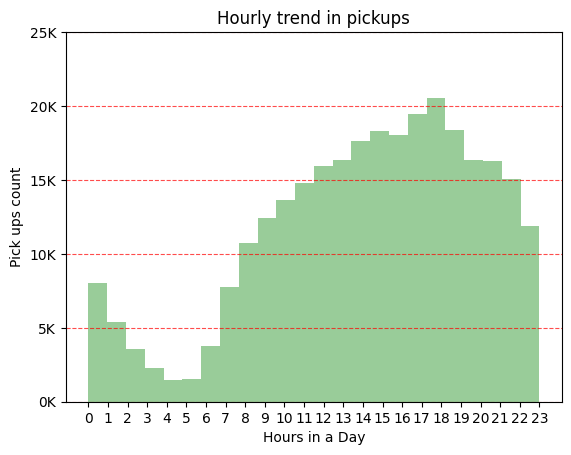

In [133]:

# Find and show the hourly trends in taxi pickups
import warnings
warnings.filterwarnings("ignore")
plt.title("Hourly trend in pickups")
sns.distplot(df.hours,bins=24,color='green',kde=False)
# Customizing the ticks to match each bin
plt.xticks(np.linspace(min(df.hours), max(df.hours), 24))  # Adjust 24 ticks for the bins
ticks=np.arange(0,30000,5000)
labels=["{}K".format(i//1000) for i in ticks]
plt.grid(axis='y', linestyle='--', alpha=0.7, color='Red')
plt.yticks(ticks,labels)
plt.xlabel("Hours in a Day")
plt.ylabel("Pick ups count")
plt.show()

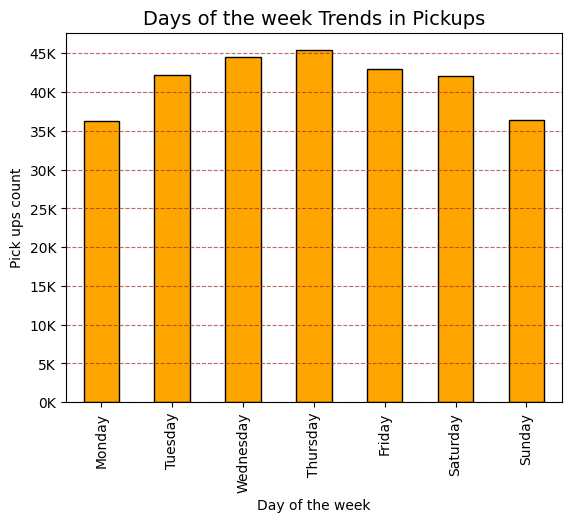

In [134]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.title("Days of the week Trends in Pickups",fontsize=14)

# Correct order of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['DayOftheWeek'] = pd.Categorical(df['DayOftheWeek'], categories=day_order, ordered=True)

# Plotting a bar graph
df['DayOftheWeek'].value_counts().sort_index().plot.bar(color='Orange', edgecolor='black')
ticks=np.arange(0,50000,5000)
labels=["{}K".format(i//1000) for i in ticks]
plt.grid(axis='y', linestyle='--', alpha=0.7, color='brown')
plt.yticks(ticks,labels)
plt.xlabel("Day of the week")
plt.ylabel("Pick ups count")
plt.show()

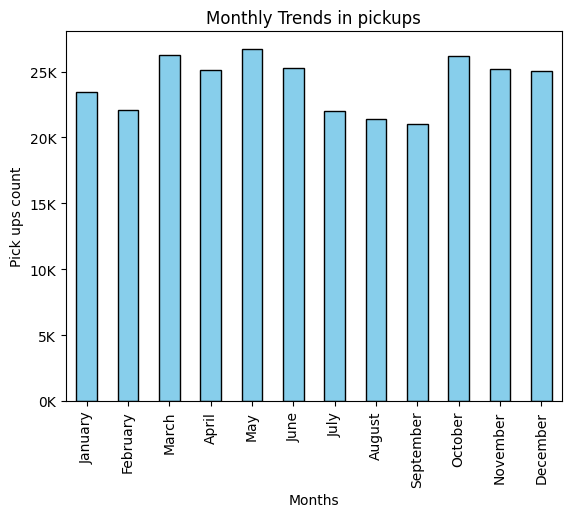

In [135]:
# Show the monthly trends in pickups
# Find and show the daily trends in taxi pickups (days of the week)


# Define the correct order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

# Convert 'month' column to Categorical type with specified order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the ordered 'month' column
df = df.sort_values('month')

plt.title("Monthly Trends in pickups")
df['month'].value_counts().sort_index().plot.bar(color='SkyBlue', edgecolor='black')
ticks=np.arange(0,30000,5000)
labels=["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.xlabel("Months")
plt.ylabel("Pick ups count")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [136]:
# Analyse the above parameters
df[['Fare_Amount','Tip_Amount','Total_Amount','Trip_Distance']]=df[['Fare_Amount','Tip_Amount','Total_Amount','Trip_Distance']].round(2)
df.head()
df[['Fare_Amount','Tip_Amount','Total_Amount','Trip_Distance']].describe()

Fare_Amount     Tip_Amount   Total_Amount  Trip_Distance
count  289733.000000  289733.000000  289733.000000  289733.000000
mean       19.732511       3.576657      28.860694       3.442369
std        18.415581       4.024797      23.001969       4.536631
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.050000
50%        13.500000       2.860000      21.000000       1.790000
75%        21.900000       4.450000      30.700000       3.380000
max      1375.000000     170.000000    1435.190000     204.860000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [137]:
# Create a df with non zero entries for the selected parameters.
df1=df[~((df['Trip_Distance']==0)&(df['Total_Amount']<=0))]



In [138]:
df1.head()

Vendor_Id Tpep_Pickup_Datetime Tpep_Dropoff_Datetime  Passenger_Count  \
299999          2  2023-01-31 10:04:40   2023-01-31 10:11:38                1   
171820          2  2023-01-18 08:41:57   2023-01-18 08:52:38                1   
20967           2  2023-01-08 02:52:37   2023-01-08 03:16:54                2   
277041          2  2023-01-04 23:27:50   2023-01-04 23:45:01                1   
250019          2  2023-01-12 22:14:47   2023-01-12 22:24:55                1   

        Trip_Distance  Rate_Code_Id Store_And_Fwd_Flag  Pu_Location_Id  \
299999           0.63             1                  N             164   
171820           1.49             1                  N             237   
20967            3.12             1                  N             246   
277041           4.15             1                  N             246   
250019           2.23             1                  N             161   

        Do_Location_Id  Payment_Type  ...  Tip_Amount  Tolls_Amount  \
299999             161             1  ...        2.38           0.0   
171820             162             1  ...        3.08           0.0   
20967              237             2  ...        0.00           0.0   
277041             236             1  ...        5.24           0.0   
250019             140             1  ...        3.42           0.0   

        Improvement_Surcharge  Total_Amount  Congestion_Surcharge  \
299999                    1.0         14.28                   2.5   
171820                    1.0         18.48                   2.5   
20967                     1.0         19.90                   2.5   
277041                    1.0         31.44                   2.5   
250019                    1.0         20.52                   2.5   

        Airport_Fee           Timestamp  hours  DayOftheWeek    month  
299999          0.0 2023-01-31 10:04:40     10       Tuesday  January  
171820          0.0 2023-01-18 08:41:57      8     Wednesday  January  
20967           0.0 2023-01-08 02:52:37      2        Sunday  January  
277041          0.0 2023-01-04 23:27:50     23     Wednesday  January  
250019          0.0 2023-01-12 22:14:47     22      Thursday  January  

[5 rows x 23 columns]

In [139]:
df1=df1[~(df1.Trip_Distance==0)]
df1=df1[~(df1.Total_Amount<=0)]
df1=df1[~(df1.Fare_Amount<=0)]
df1[['Trip_Distance','Total_Amount','Fare_Amount','Tip_Amount']].describe()

Trip_Distance   Total_Amount    Fare_Amount     Tip_Amount
count  286095.000000  286095.000000  286095.000000  286095.000000
mean        3.485273      28.779981      19.623631       3.584388
std         4.547770      22.606322      17.939805       3.966912
min         0.010000       1.010000       0.010000       0.000000
25%         1.090000      15.960000       9.300000       1.000000
50%         1.800000      21.000000      13.500000       2.880000
75%         3.400000      30.600000      21.900000       4.470000
max       204.860000    1435.190000    1375.000000     100.000000

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [140]:
# Group data by month and analyse monthly revenue
groupedData=df1.groupby('month')['Total_Amount'].sum()
groupedData=groupedData.reset_index()
import plotly.express as pltly
fig=pltly.line(groupedData,x='month',y='Total_Amount',title="Monthly Revenue")
fig.update_layout(width=800,height=450)
fig.show()

In [141]:
df1['Quarter']=df1['Timestamp'].dt.quarter
df1['Quarter'].value_counts()

Quarter
2    76253
4    75526
1    70863
3    63453
Name: count, dtype: int64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

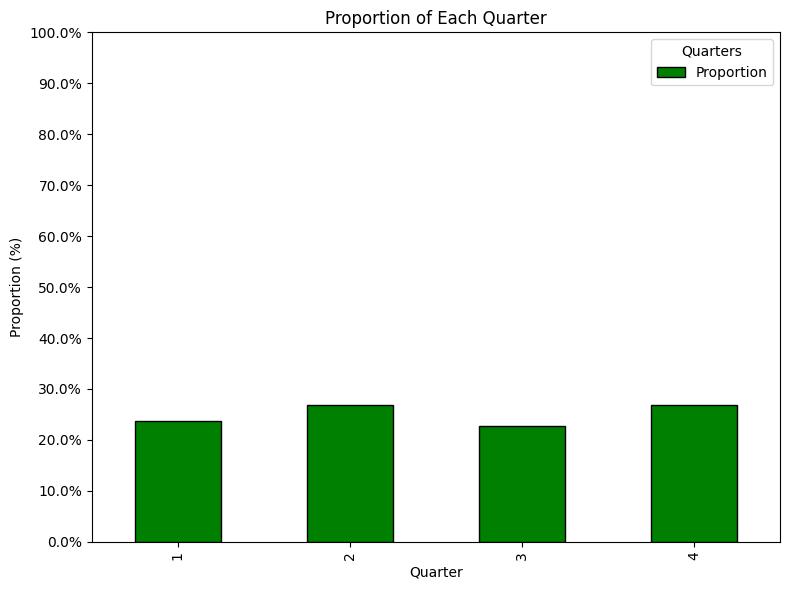

In [142]:
# Calculate totals for each quarter
quarterlyGrouped = df1.groupby('Quarter')['Total_Amount'].sum().reset_index()

# proportion for each quarter from total Amount
total_amount = quarterlyGrouped['Total_Amount'].sum()

quarterlyGrouped['Proportion'] = quarterlyGrouped['Total_Amount'] / total_amount

# Plot the proportion for each quarter
quarterlyGrouped.plot(kind="bar", x='Quarter', y='Proportion', color='Green', edgecolor='black', figsize=(8, 6))

# # Add y-ticks in percentage
yticks = np.arange(0, 1.1, 0.1)
Ylabels = ["{}%".format(round((i * 100), 2)) for i in yticks]
plt.yticks(yticks, Ylabels)

# # Add title and labels
plt.title("Proportion of Each Quarter")
plt.xlabel("Quarter")
plt.ylabel("Proportion (%)")
plt.legend(["Proportion"], title="Quarters")
plt.tight_layout()

# # Show the plot
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

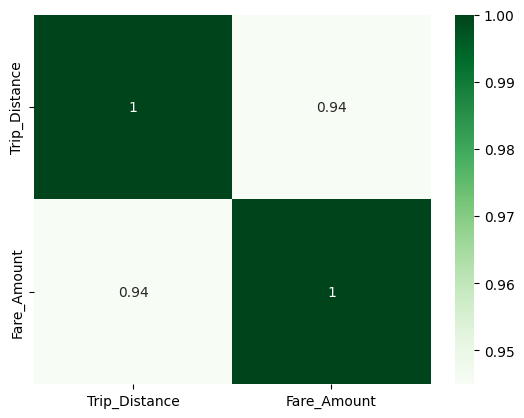

               Trip_Distance  Fare_Amount
Trip_Distance       1.000000     0.944946
Fare_Amount         0.944946     1.000000


In [143]:
# Show how trip fare is affected by distance
relationshipDf=df1[['Trip_Distance','Fare_Amount']]
correlation_matrix =relationshipDf.corr()
sns.heatmap(correlation_matrix,cmap='Greens',annot=True)
plt.show()

print(correlation_matrix)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

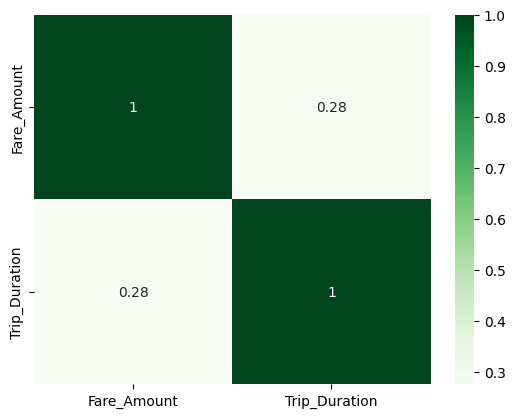

In [144]:
# Show relationship between fare and trip duration
df1['Trip_Duration']=df1['Tpep_Dropoff_Datetime']-df1['Tpep_Pickup_Datetime']

# Convert Trip_Duration to timedelta
df1['Trip_Duration'] = pd.to_timedelta(df1['Trip_Duration'])

# Convert timedelta to total minutes
df1['Trip_Duration_Minutes'] = df1['Trip_Duration'].dt.total_seconds() / 60

# Calculate correlation
correlationTDFA = df1[['Fare_Amount','Trip_Duration']].corr()

sns.heatmap(correlationTDFA,cmap='Greens',annot=True)
plt.show()


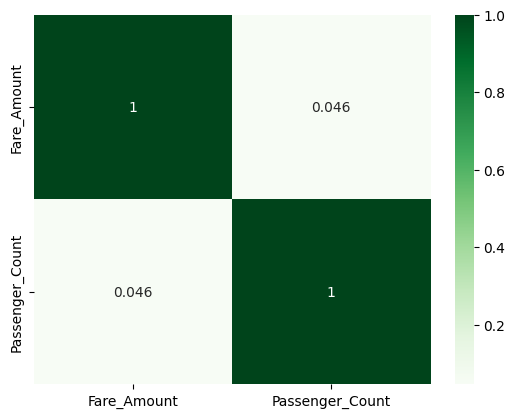

In [145]:
# Show relationship between fare and number of passengers

correlationFNP=df1[['Fare_Amount','Passenger_Count']].corr()
sns.heatmap(correlationFNP,cmap='Greens',annot=True)
plt.show()

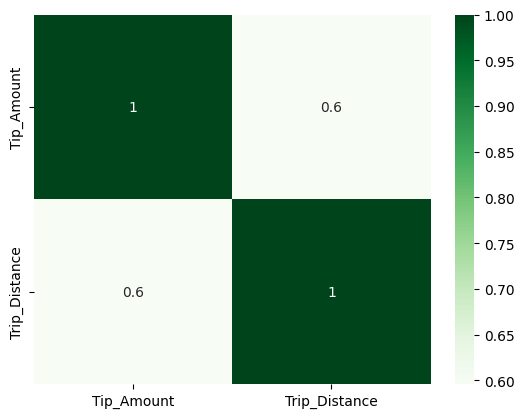

In [146]:
# Show relationship between tip and trip distance

correlationTipTD=df1[['Tip_Amount','Trip_Distance']].corr()
sns.heatmap(correlationTipTD,cmap='Greens',annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

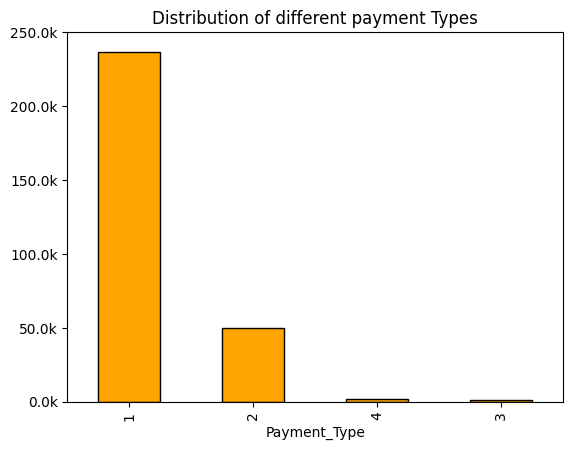

In [147]:
# Analyse the distribution of different payment types (payment_type).

df.Payment_Type.value_counts().plot.bar(color='Orange',edgecolor='Black')

yticks = np.arange(0,300000, 50000)
Ylabels = ["{}k".format(i/1000) for i in yticks]
plt.yticks(yticks, Ylabels)
plt.title('Distribution of different payment Types')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [148]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [149]:
# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

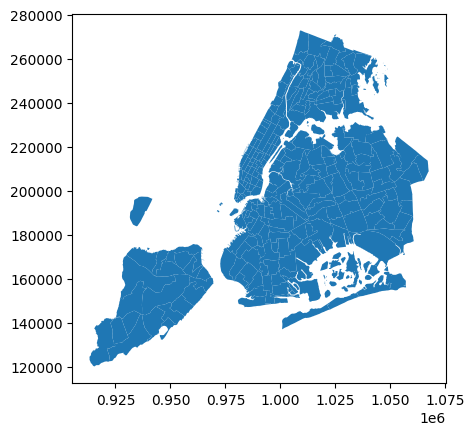

In [150]:
print(zones.info())
zones.plot()

In [151]:
df1.columns


Index(['Vendor_Id', 'Tpep_Pickup_Datetime', 'Tpep_Dropoff_Datetime',
       'Passenger_Count', 'Trip_Distance', 'Rate_Code_Id',
       'Store_And_Fwd_Flag', 'Pu_Location_Id', 'Do_Location_Id',
       'Payment_Type', 'Fare_Amount', 'Extra', 'Mta_Tax', 'Tip_Amount',
       'Tolls_Amount', 'Improvement_Surcharge', 'Total_Amount',
       'Congestion_Surcharge', 'Airport_Fee', 'Timestamp', 'hours',
       'DayOftheWeek', 'month', 'Quarter', 'Trip_Duration',
       'Trip_Duration_Minutes'],
      dtype='object')

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [152]:
# Merge zones and trip records using locationID and PULocationID

trips_and_zones=pd.merge(df1,zones,left_on='Pu_Location_Id',right_on='LocationID',how='left')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [153]:
# Group data by location and calculate the number of trips
groupedData=trips_and_zones.groupby('LocationID').size()

trip_counts=groupedData.reset_index(name='No Of Trips')


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [154]:
# Merge trip counts back to the zones GeoDataFrame

zones=pd.merge(zones,trip_counts,left_on='LocationID',right_on='LocationID',how='left')
zones=zones[~(zones['No Of Trips'].isnull())]
zones.describe()

OBJECTID  Shape_Leng  Shape_Area  LocationID   No Of Trips
count  239.000000  239.000000  239.000000  239.000000    239.000000
mean   132.435146    0.089301    0.000349  132.430962   1186.652720
std     76.572993    0.046780    0.000350   76.577160   2787.859717
min      1.000000    0.019271    0.000018    1.000000      1.000000
25%     65.500000    0.054224    0.000130   65.500000      6.000000
50%    135.000000    0.083242    0.000248  135.000000     16.000000
75%    199.000000    0.116166    0.000447  199.000000    169.500000
max    263.000000    0.290556    0.002196  263.000000  14964.000000

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

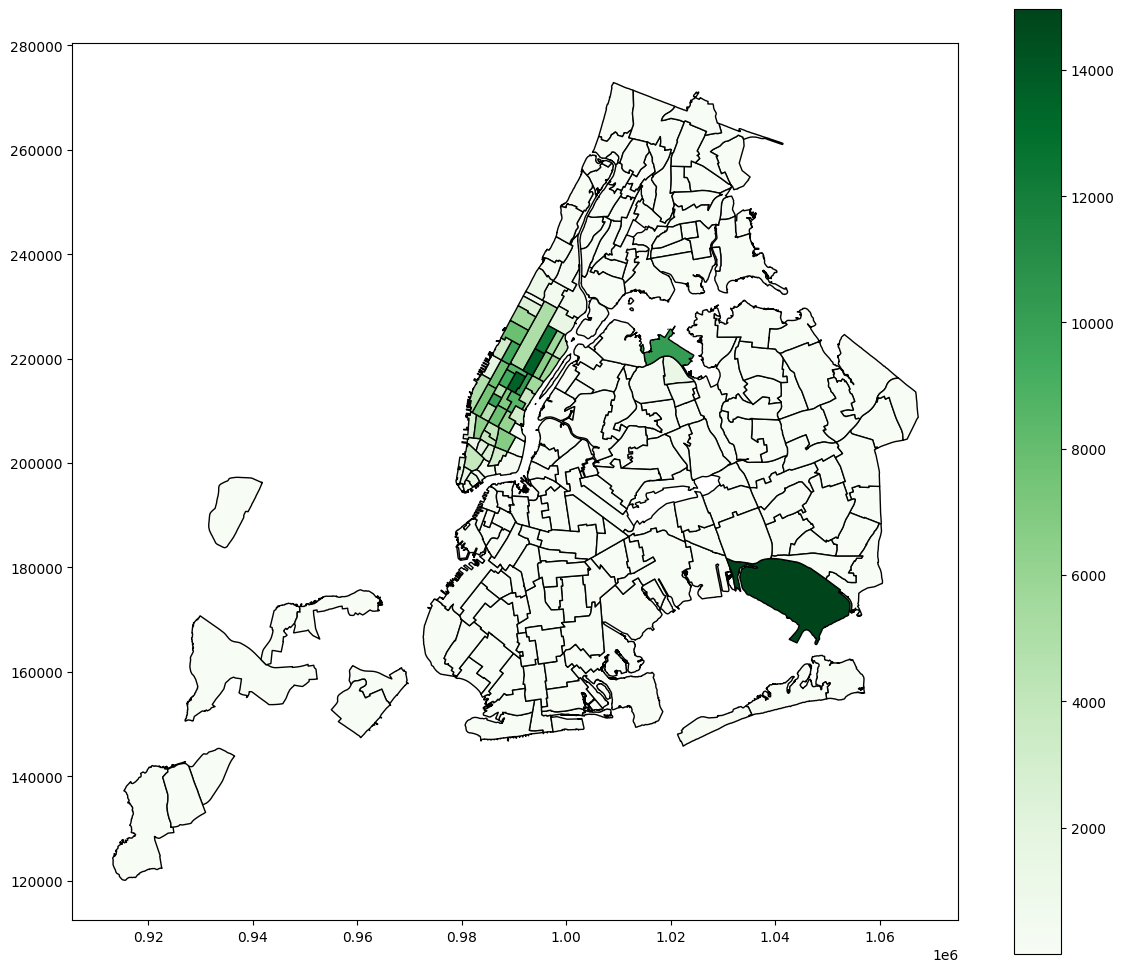

In [155]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column='No Of Trips',  # Column to color-code the map
    ax=ax,
    cmap="Greens",           # Color map
    legend=True,
     edgecolor='black' # Adding border
)

#Legend sometimes throws None, handling the below way to display the legend properly
leg = ax.get_legend()
if leg:  # Check if the legend exists
    leg.set_bbox_to_anchor((2, 1))  # Adjust position
    leg.set_title("Number of Trips")  # Add title

plt.tight_layout()
# Show the plot
plt.show()


In [156]:
# can you try displaying the zones DF sorted by the number of trips?
zones.columns
sortedZones=zones.sort_values(by='No Of Trips',ascending=False)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
5  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   

   No Of Trips  
0          9.0  
2          6.0  
3        317.0  
4          2.0  
5          3.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [157]:
# Find routes which have the slowest speeds at different times of the day

# Filter trips with valid data
trips_and_zones = trips_and_zones[trips_and_zones['Trip_Duration_Minutes'] > 0]
trips_and_zones = trips_and_zones[trips_and_zones['Passenger_Count'] > 0]

# Calculate mean trip duration for each route and hour
mean_duration = trips_and_zones.groupby(['Pu_Location_Id', 'Do_Location_Id', 'hours'])['Trip_Duration_Minutes'].mean().reset_index()

# Merging mean with tripzones data set
merged_with_duration = trips_and_zones.merge(
    mean_duration,
    on=['Pu_Location_Id', 'Do_Location_Id', 'hours'],
    how='left',
    suffixes=('', '_grouped')
)

# Removed invalid values
merged_with_duration = merged_with_duration[merged_with_duration['Trip_Duration_Minutes_grouped'] > 0]

# Calculate speed
merged_with_duration['Speed'] = merged_with_duration['Trip_Distance'] / (merged_with_duration['Trip_Duration_Minutes_grouped'] / 60)

# Identify the slowest routes
slowest_routes = merged_with_duration.nsmallest(10, 'Speed')

# Display the results
print(slowest_routes[['Pu_Location_Id', 'Do_Location_Id', 'hours', 'Speed']])

        Pu_Location_Id  Do_Location_Id  hours     Speed
173313             138             138     22  0.005530
27456              243             264     17  0.007772
235921              68              68      2  0.009989
142270             226             226     15  0.012857
91730              132             264     13  0.014118
73991              132             264     19  0.018433
124695             132             132     10  0.019843
219349             132             264     16  0.022267
91997               48              48      1  0.024621
240829              48              48      1  0.024621


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

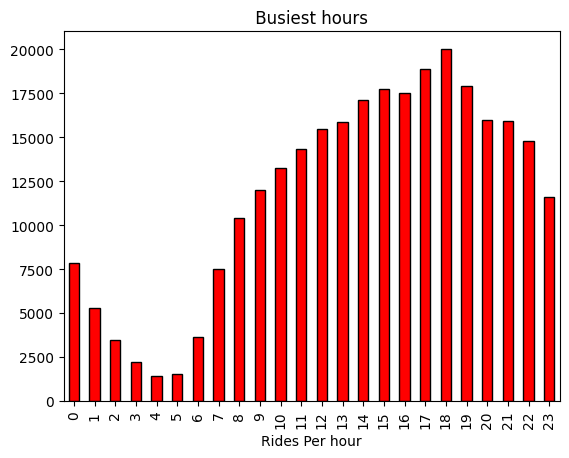

Busiest hour -->  18  with Rides  400300.0


In [158]:
# Visualise the number of trips per hour and find the busiest hour

hoursDf=merged_with_duration.groupby('hours').size().plot(
    kind='bar',
    color='Red',
    edgecolor='Black'
)
plt.title(" Busiest hours ")
plt.xlabel("Hours")
plt.xlabel("Rides Per hour")
plt.show()

RidesInBusiestHour=merged_with_duration.groupby('hours').size().max()/0.05 # Scaled up the number

print("Busiest hour --> ",merged_with_duration.groupby('hours').size().idxmax()," with Rides ",RidesInBusiestHour)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [159]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
# top 5 busiest hours
hoursDf=merged_with_duration.groupby('hours').size().reset_index(name='Trips Per Hour')
hoursDf['Scaled Up Value']=hoursDf['Trips Per Hour']/0.008 # total records were approx 3.6 crore and after sampling with 0.05 I have got 18 lakh+ records and I have sampled again 3 lakh records out of it. So the fraction is around 0.008
sortedHours=hoursDf.sort_values(by='Trips Per Hour', ascending=False)
print(sortedHours.head())



    hours  Trips Per Hour  Scaled Up Value
18     18           20015        2501875.0
17     17           18901        2362625.0
19     19           17930        2241250.0
15     15           17741        2217625.0
16     16           17507        2188375.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

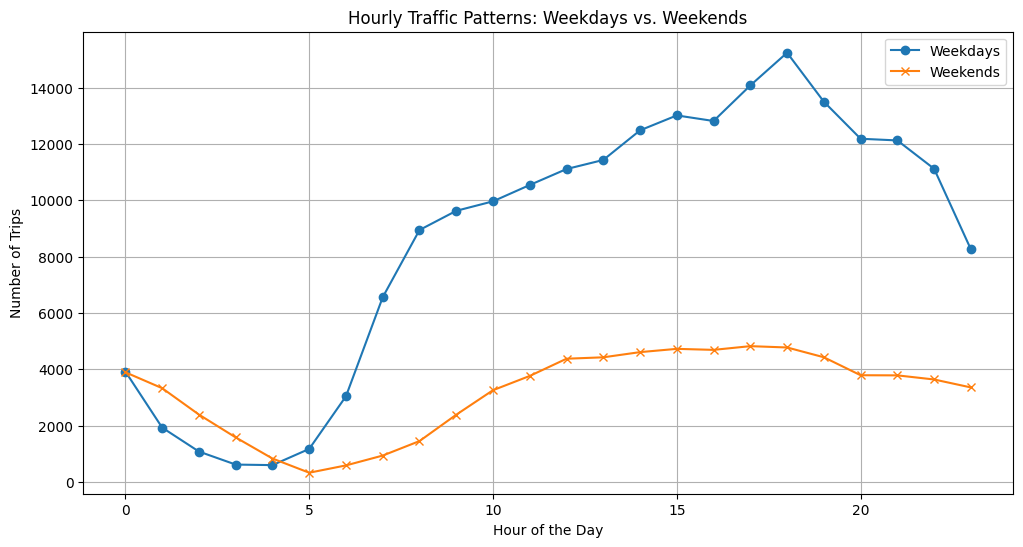

In [160]:


# Compare traffic trends for the week days and weekends

#First we need to create a column called 'day type' based on the timestamp
trips_and_zones['day_type']=trips_and_zones['Timestamp'].dt.day_of_week.apply(lambda x: 'weekday' if x < 5 else 'weekend')

# Group data for weekdays
weekday_data = trips_and_zones[trips_and_zones['day_type'] == 'weekday']
weekday_hours = weekday_data.groupby('hours').size().reset_index(name='Weekday Trips')

# Group data for weekends
weekend_data = trips_and_zones[trips_and_zones['day_type'] == 'weekend']
weekend_hours = weekend_data.groupby('hours').size().reset_index(name='Weekend Trips')

# Merge the two for comparison
comparison_df = weekday_hours.merge(weekend_hours, on='hours', how='outer').fillna(0)

# Setting up a layout
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['hours'], comparison_df['Weekday Trips'], label='Weekdays', marker='o')
plt.plot(comparison_df['hours'], comparison_df['Weekend Trips'], label='Weekends', marker='x')

plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.show()


In [161]:
trips_and_zones.info()
trips_and_zones=trips_and_zones[~(trips_and_zones.LocationID.isnull())]
trips_and_zones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281613 entries, 0 to 286108
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Vendor_Id              281613 non-null  int64          
 1   Tpep_Pickup_Datetime   281613 non-null  datetime64[us] 
 2   Tpep_Dropoff_Datetime  281613 non-null  datetime64[us] 
 3   Passenger_Count        281613 non-null  int64          
 4   Trip_Distance          281613 non-null  float64        
 5   Rate_Code_Id           281613 non-null  int64          
 6   Store_And_Fwd_Flag     281613 non-null  object         
 7   Pu_Location_Id         281613 non-null  int64          
 8   Do_Location_Id         281613 non-null  int64          
 9   Payment_Type           281613 non-null  int64          
 10  Fare_Amount            281613 non-null  float64        
 11  Extra                  281613 non-null  float64        
 12  Mta_Tax                281613 non-n

In [162]:
#Seperating zone with location ID#
trips_and_zones.columns
onlyZones=zones[['LocationID','zone']]
onlyZones.columns


Index(['LocationID', 'zone'], dtype='object')

In [163]:
trips_and_zones=trips_and_zones.rename(columns={'zone':'PickUpZone'})
trips_and_zones=pd.merge(trips_and_zones,onlyZones,left_on='Do_Location_Id',right_on='LocationID',how='left')


In [164]:
trips_and_zones.columns
trips_and_zones=trips_and_zones.rename(columns={'zone':'DropOffZone'})
trips_and_zones.columns

Index(['Vendor_Id', 'Tpep_Pickup_Datetime', 'Tpep_Dropoff_Datetime',
       'Passenger_Count', 'Trip_Distance', 'Rate_Code_Id',
       'Store_And_Fwd_Flag', 'Pu_Location_Id', 'Do_Location_Id',
       'Payment_Type', 'Fare_Amount', 'Extra', 'Mta_Tax', 'Tip_Amount',
       'Tolls_Amount', 'Improvement_Surcharge', 'Total_Amount',
       'Congestion_Surcharge', 'Airport_Fee', 'Timestamp', 'hours',
       'DayOftheWeek', 'month', 'Quarter', 'Trip_Duration',
       'Trip_Duration_Minutes', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'PickUpZone', 'LocationID_x', 'borough', 'geometry', 'day_type',
       'LocationID_y', 'DropOffZone'],
      dtype='object')

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

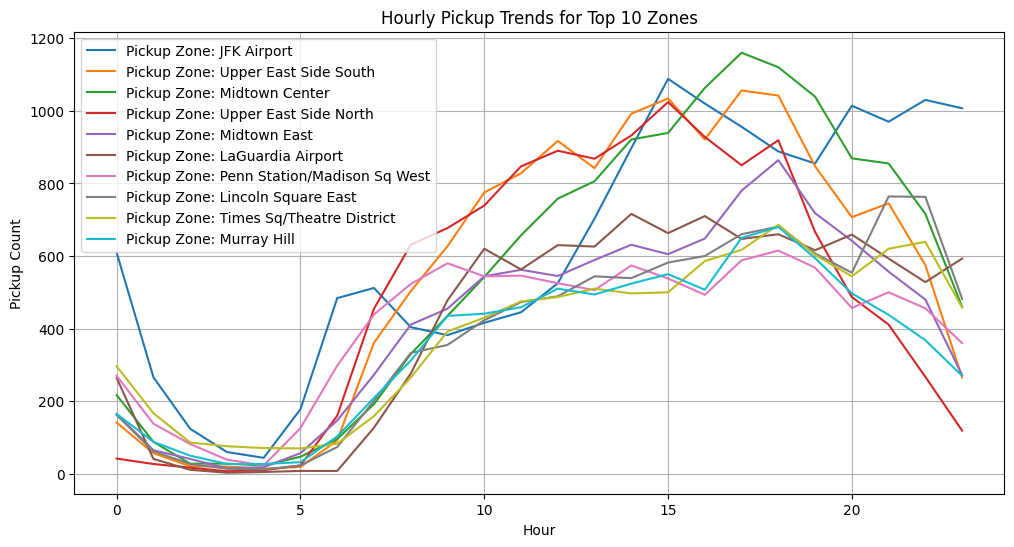

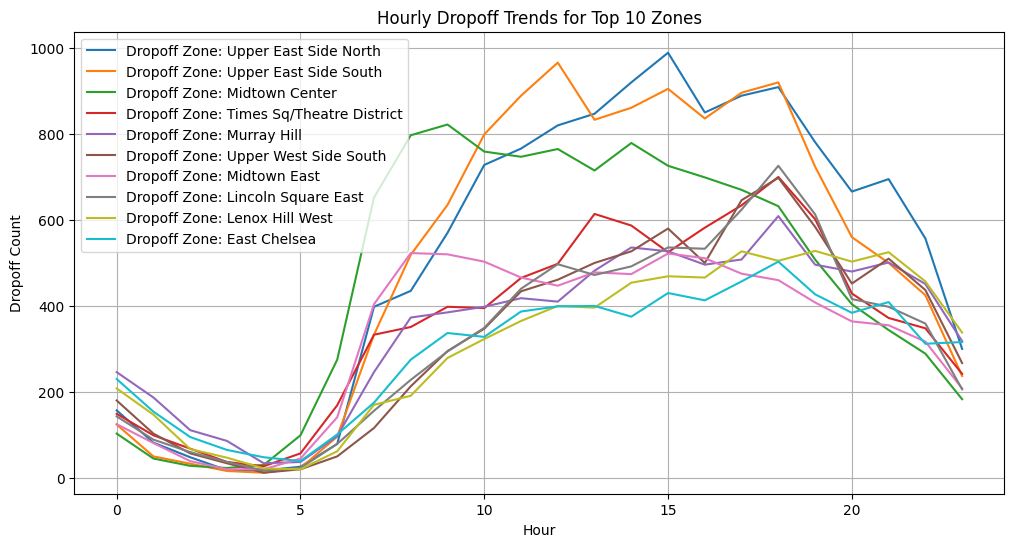

In [165]:
# Find top 10 pickup and dropoff zones

# Top 10 zones with high hourly pickups
pickup_df = trips_and_zones.groupby(['PickUpZone','hours'])['Pu_Location_Id'].size().reset_index(name='Pickup Count')

top_pickup_zones = pickup_df.groupby('PickUpZone')['Pickup Count'].sum().nlargest(10).index

pickup_trends = pickup_df[pickup_df['PickUpZone'].isin(top_pickup_zones)]

# Top 10 zones with high hourly dropoffs
dropoff_df = trips_and_zones.groupby(['DropOffZone','hours'])['Do_Location_Id'].size().reset_index(name='Dropoff Count')

dropoff_df = dropoff_df.groupby(['DropOffZone', 'hours']).sum().reset_index()

top_dropoff_zones = dropoff_df.groupby('DropOffZone')['Dropoff Count'].sum().nlargest(10).index

dropoff_trends = dropoff_df[dropoff_df['DropOffZone'].isin(top_dropoff_zones)]

# Plot pickup trends for top zones
plt.figure(figsize=(12, 6))

for zone in top_pickup_zones:

    zone_trend = pickup_trends[pickup_trends['PickUpZone'] == zone]

    plt.plot(zone_trend['hours'], zone_trend['Pickup Count'],label=f'Pickup Zone: {zone}')

plt.title('Hourly Pickup Trends for Top 10 Zones')

plt.xlabel('Hour')

plt.ylabel('Pickup Count')

plt.grid(True)

plt.legend()

plt.show()

# Plot dropoff trends for top zones
plt.figure(figsize=(12, 6))


for zone in top_dropoff_zones:

    zone_trend = dropoff_trends[dropoff_trends['DropOffZone'] == zone]

    plt.plot(zone_trend['hours'], zone_trend['Dropoff Count'],label=f'Dropoff Zone: {zone}')

plt.title('Hourly Dropoff Trends for Top 10 Zones')

plt.xlabel('Hour')
plt.grid(True)

plt.ylabel('Dropoff Count')

plt.legend()


plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [166]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

def PickDropRatio(dataFrame):
  pickup_counts = dataFrame.groupby('PickUpZone')['Pu_Location_Id'].count().reset_index(name='Pickup Count')
  dropoff_counts = dataFrame.groupby('DropOffZone')['Do_Location_Id'].count().reset_index(name='Dropoff Count') # Total drop-offs for each zone
  print(pickup_counts.columns)
  print(dropoff_counts.columns)




# #zone_counts has the merged data
  zone_counts=pd.merge(pickup_counts,dropoff_counts,left_on='PickUpZone',right_on='DropOffZone',how='outer')
  zone_counts.columns
#Create a new column called pickup_to_dropoff_Ratio
  zone_counts['Ratio'] = zone_counts['Pickup Count'] / zone_counts['Dropoff Count']

  Top_Ten_PickupDropOffRatio=zone_counts.sort_values(by=['Ratio'],ascending=False)
  print("10 Highest pick ups/Drops ratio")

  print(Top_Ten_PickupDropOffRatio[['PickUpZone','DropOffZone','Ratio']].head(10))
  Lowest_Ten_DropOffRatio=zone_counts.sort_values(by=['Ratio'],ascending=True)
  print("10 Lowest   pick ups/Drops ratio")


  print(Lowest_Ten_DropOffRatio[['PickUpZone','DropOffZone','Ratio']].head(10))
PickDropRatio(trips_and_zones) # Method call to find ratio

Index(['PickUpZone', 'Pickup Count'], dtype='object')
Index(['DropOffZone', 'Dropoff Count'], dtype='object')
10 Highest pick ups/Drops ratio
                       PickUpZone                   DropOffZone     Ratio
62                  East Elmhurst                 East Elmhurst  9.773723
111                   JFK Airport                   JFK Airport  4.997313
120             LaGuardia Airport             LaGuardia Airport  2.939713
165  Penn Station/Madison Sq West  Penn Station/Madison Sq West  1.549470
38                   Central Park                  Central Park  1.408329
98        Greenwich Village South       Greenwich Village South  1.398805
225                  West Village                  West Village  1.382257
143                  Midtown East                  Midtown East  1.275360
124           Lincoln Square East           Lincoln Square East  1.210222
142                Midtown Center                Midtown Center  1.206869
10 Lowest   pick ups/Drops ratio
           

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [167]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# we need to split the entire df into a subset between 11PM to 5AM
specificTimeRange=trips_and_zones[(trips_and_zones.hours>=23)|(trips_and_zones.hours<=5)]
PickDropRatio(specificTimeRange)

Index(['PickUpZone', 'Pickup Count'], dtype='object')
Index(['DropOffZone', 'Dropoff Count'], dtype='object')
10 Highest pick ups/Drops ratio
                        PickUpZone                    DropOffZone      Ratio
109                    JFK Airport                    JFK Airport  10.079295
60                   East Elmhurst                  East Elmhurst   5.720000
96         Greenwich Village South        Greenwich Village South   3.578249
118              LaGuardia Airport              LaGuardia Airport   3.400735
220                   West Village                   West Village   2.566667
128                Lower East Side                Lower East Side   2.250725
137  Meatpacking/West Village West  Meatpacking/West Village West   2.071856
92                       Gravesend                      Gravesend   2.000000
69                    East Village                   East Village   1.927173
203      Times Sq/Theatre District      Times Sq/Theatre District   1.802651
10 Lowest  

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

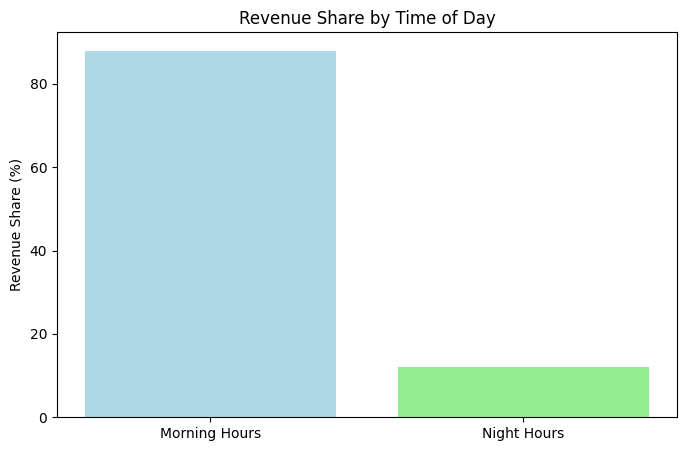

In [168]:
# Filter for night hours (>=11 PM to <=5 AM)

nighthours=trips_and_zones[(trips_and_zones.hours>=23)|(trips_and_zones.hours<=5)]

# Filter for moning hours hours (>5 AM to  <11PM)
morningHours=trips_and_zones[(trips_and_zones.hours>5)&(trips_and_zones.hours<23)]

TotalRevenue=trips_and_zones.Total_Amount.sum()
MorningRevenue=morningHours.Total_Amount.sum()
NightRevenue=nighthours.Total_Amount.sum()

labels = ['Morning Hours', 'Night Hours']
values = [(MorningRevenue / TotalRevenue) * 100, (NightRevenue / TotalRevenue) * 100]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.ylabel('Revenue Share (%)')
plt.title('Revenue Share by Time of Day')
plt.show()




##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

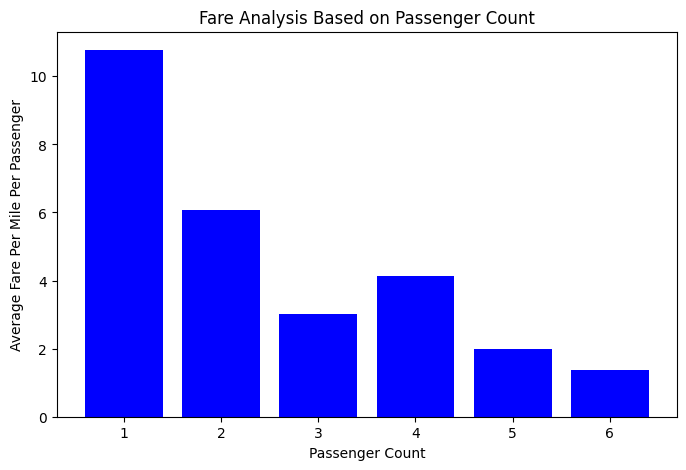

Passenger_Count  Fare_Per_Mile_Per_Passenger
0                1                    10.772421
1                2                     6.073157
2                3                     3.032210
3                4                     4.131886
4                5                     1.985144
5                6                     1.368157

In [169]:
# Analyse the fare per mile per passenger for different passenger counts
trips_and_zones['Fare_Per_Mile']=trips_and_zones['Fare_Amount']/trips_and_zones['Trip_Distance']
trips_and_zones['Fare_Per_Mile_Per_Passenger']=trips_and_zones['Fare_Per_Mile']/trips_and_zones['Passenger_Count']
average_fare_per_mile=trips_and_zones.groupby('Passenger_Count')['Fare_Per_Mile_Per_Passenger'].mean().reset_index();

plt.figure(figsize=(8, 5))
plt.bar(average_fare_per_mile['Passenger_Count'], average_fare_per_mile['Fare_Per_Mile_Per_Passenger'], color='blue')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Per Mile Per Passenger')
plt.title('Fare Analysis Based on Passenger Count')
plt.show()

average_fare_per_mile


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [170]:
# Compare the average fare per mile for different days and for different times of the day
average_fare_per_mile_by_hours=trips_and_zones.groupby('hours')['Fare_Per_Mile'].mean().reset_index();
print(average_fare_per_mile_by_hours)
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
average_fare_per_mile_by_Days=trips_and_zones.groupby('DayOftheWeek')['Fare_Per_Mile'].mean().reset_index();
print(average_fare_per_mile_by_Days)

    hours  Fare_Per_Mile
0       0       9.277843
1       1       9.955118
2       2       7.168307
3       3       7.281002
4       4      13.361527
5       5      10.116837
6       6      12.805245
7       7      10.155155
8       8      11.325922
9       9      11.591713
10     10      11.010553
11     11      11.483325
12     12      11.206079
13     13      12.205584
14     14      12.018717
15     15      13.605556
16     16      12.800091
17     17      11.073606
18     18      11.073841
19     19      12.078477
20     20       8.773620
21     21       8.419510
22     22       9.518513
23     23       9.424048
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
  DayOftheWeek  Fare_Per_Mile
0       Monday      10.316545
1      Tuesday      11.395693
2    Wednesday      10.889761
3     Thursday      10.740477
4       Friday      11.419325
5     Saturday      10.544678
6       S

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    Vendor_Id  hours  Fare_Per_Mile
0           1      0       6.743551
1           1      1       7.495433
2           1      2       6.482992
3           1      3       6.239360
4           1      4       6.211748
5           1      5       6.292383
6           1      6       6.835865
7           1      7       7.254954
8           1      8       8.403837
9           1      9       8.478623
10          1     10       8.296073
11          1     11       8.788416
12          1     12       8.995779
13          1     13       8.561097
14          1     14       8.743171
15          1     15       8.539392
16          1     16       8.873609
17          1     17       8.682260
18          1     18       8.545676
19          1     19       8.010444
20          1     20       7.282120
21          1     21       7.138112
22          1     22       7.161691
23          1     23       7.008599
24          2      0       9.971666
25          2      1      10.628503
26          2      2       7

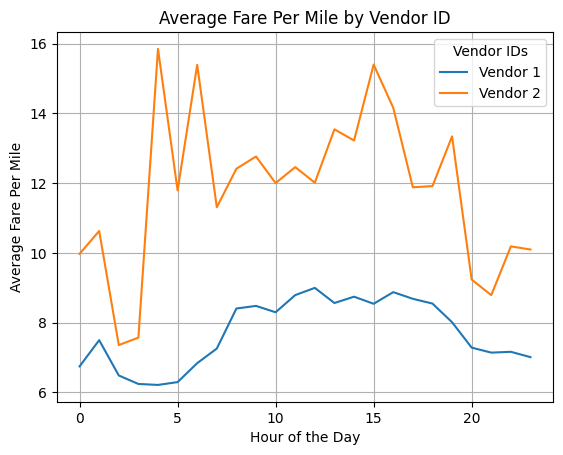

In [171]:
# Compare fare per mile for different vendors
average_fare_per_mile_VendorId=trips_and_zones.groupby(['Vendor_Id','hours'])['Fare_Per_Mile'].mean().reset_index();
print(average_fare_per_mile_VendorId)
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')


# Plot Design
for vendor in average_fare_per_mile_VendorId['Vendor_Id'].unique():
    # Filter data for each vendor
    vendor_data = average_fare_per_mile_VendorId[average_fare_per_mile_VendorId['Vendor_Id'] == vendor]
    plt.plot(vendor_data['hours'], vendor_data['Fare_Per_Mile'], label=f'Vendor {vendor}')

# Customize the graph
plt.title('Average Fare Per Mile by Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Per Mile')
plt.legend(title="Vendor IDs")
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   Vendor_Id              Distance_Tier  Fare_Per_Mile
0          1      Tier 1: Up to 2 miles       9.955411
1          1       Tier 2: 2 to 5 miles       6.371227
2          1  Tier 3: More than 5 miles       4.410983
3          2      Tier 1: Up to 2 miles      17.156199
4          2       Tier 2: 2 to 5 miles       6.543560
5          2  Tier 3: More than 5 miles       4.507841


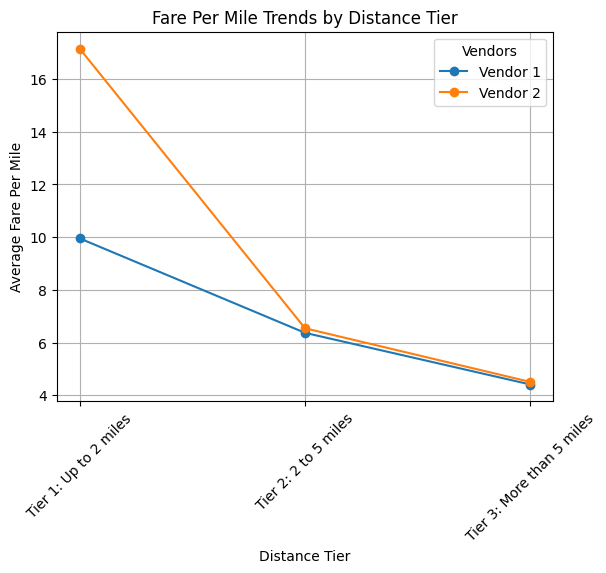

In [172]:
# Defining distance tiers
trips_and_zones.columns
# Step 1: Define tiers for distance
def distance_tiers(distance):
    if distance <= 2:
        return 'Tier 1: Up to 2 miles'
    elif 2 < distance <= 5:
        return 'Tier 2: 2 to 5 miles'
    else:
        return 'Tier 3: More than 5 miles'

# Assuming `merged_df` is your dataset
trips_and_zones['Distance_Tier'] = trips_and_zones['Trip_Distance'].apply(distance_tiers)

# Step 2: Group data by Vendor ID and Distance Tier
tiered_analysis = trips_and_zones.groupby(['Vendor_Id', 'Distance_Tier'])['Fare_Per_Mile'].mean().reset_index()

# Display the results
print(tiered_analysis)

# Step 3: Visualize the data
tiers = ['Tier 1: Up to 2 miles', 'Tier 2: 2 to 5 miles', 'Tier 3: More than 5 miles']
vendors = tiered_analysis['Vendor_Id'].unique()

#Plotting section
for vendor in vendors:
    vendor_data = tiered_analysis[tiered_analysis['Vendor_Id'] == vendor]
    plt.plot(
        vendor_data['Distance_Tier'],
        vendor_data['Fare_Per_Mile'],
        marker='o',
        label=f'Vendor {vendor}'
    )
plt.title('Fare Per Mile Trends by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare Per Mile')
plt.legend(title='Vendors')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

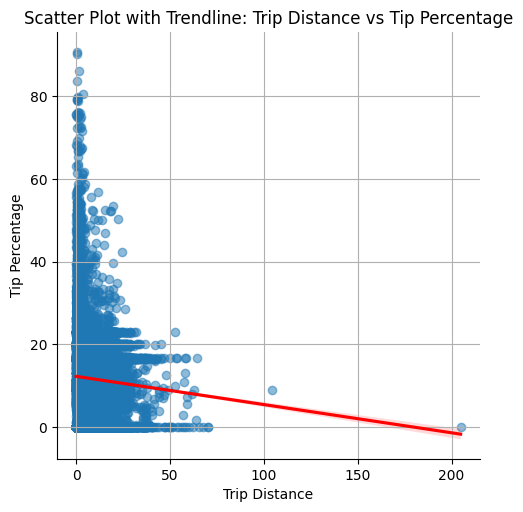

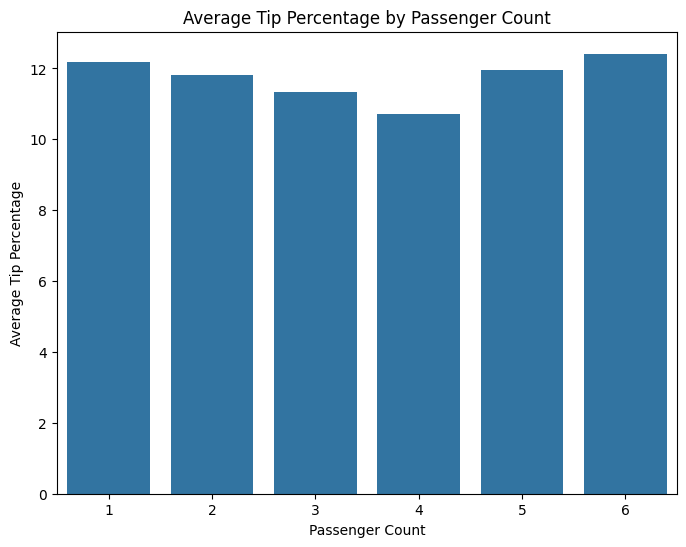

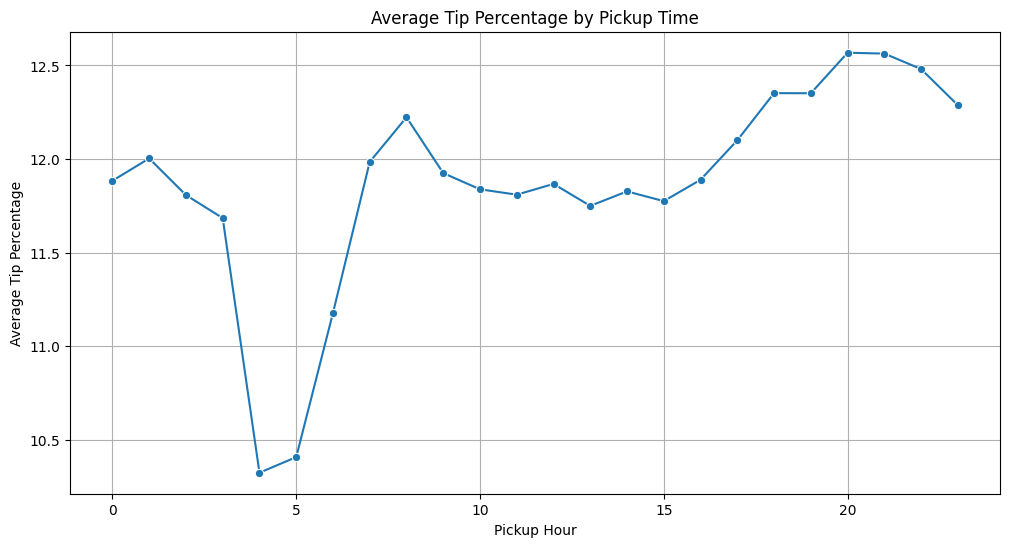

In [173]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
def anaylseTipPercentageWithVariousFactors(dataframeForAnalysis):

    #Create a new df by grouping Trip_Distance and take mean of Tip percentage
    distance_analysis = dataframeForAnalysis.groupby('Trip_Distance')['Tip_Percentage'].mean().reset_index()

    #create a new df by  Group  by passenger count and take mean of Tip percentage
    passenger_analysis = dataframeForAnalysis.groupby('Passenger_Count')['Tip_Percentage'].mean().reset_index()

    #create a new df by pickup time in hours and take mean of Tip percentage
    time_analysis = dataframeForAnalysis.groupby('hours')['Tip_Percentage'].mean().reset_index()


    # Distance vs Tip Percentage
    sns.lmplot(
               x='Trip_Distance',
               y='Tip_Percentage',
               data=trips_and_zones,
               line_kws={'color': 'red'},
               scatter_kws={'alpha': 0.5}
               )
    plt.title('Scatter Plot with Trendline: Trip Distance vs Tip Percentage')
    plt.xlabel('Trip Distance')
    plt.ylabel('Tip Percentage')
    plt.grid(True)
    plt.show()

    # Passenger Count vs Tip Percentage
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Passenger_Count', y='Tip_Percentage', data=passenger_analysis)
    plt.title('Average Tip Percentage by Passenger Count')
    plt.xlabel('Passenger Count')
    plt.ylabel('Average Tip Percentage')
    plt.show()

    # Pickup Time vs Tip Percentage
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='hours', y='Tip_Percentage', data=time_analysis, marker='o')
    plt.title('Average Tip Percentage by Pickup Time')
    plt.xlabel('Pickup Hour')
    plt.ylabel('Average Tip Percentage')
    plt.grid(True)
    plt.show()

#Calculating tip percentage
trips_and_zones['Tip_Percentage'] = (trips_and_zones['Tip_Amount'] / trips_and_zones['Total_Amount']) * 100
anaylseTipPercentageWithVariousFactors(trips_and_zones)

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

---------------Analysis of various factors when Tip Percentage <10 %----------------


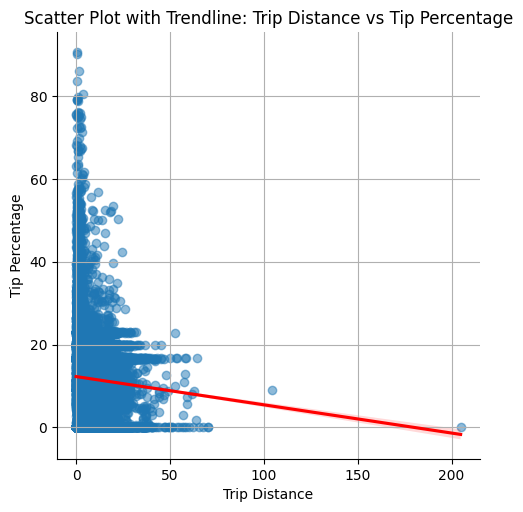

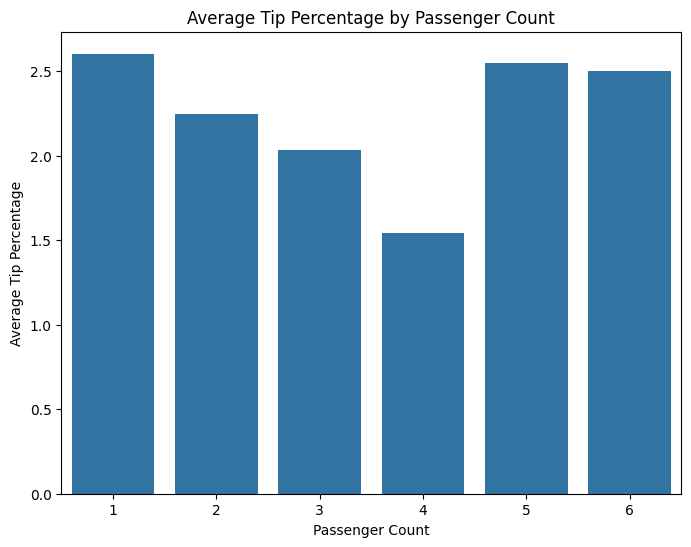

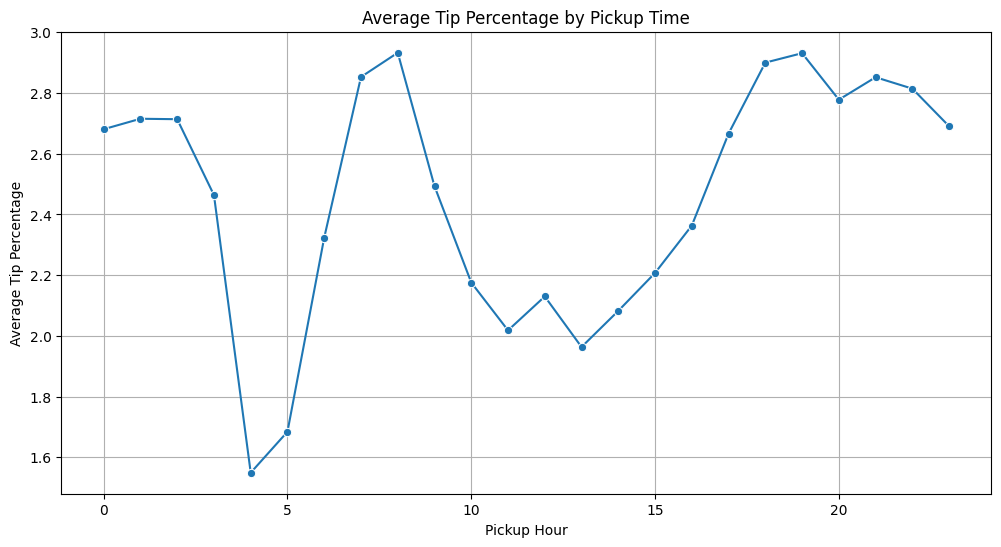

---------------Analysis of various factors when Tip Percentage >25 %----------------


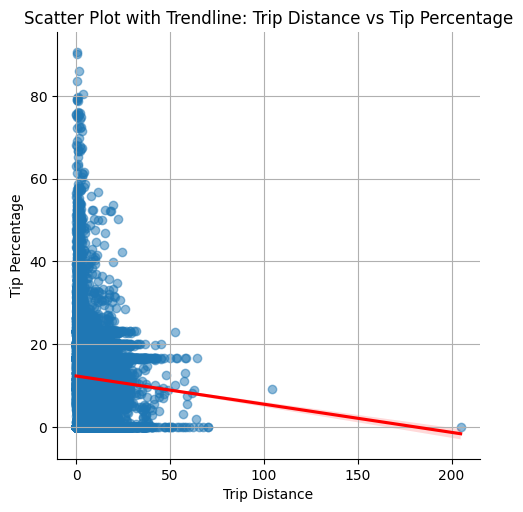

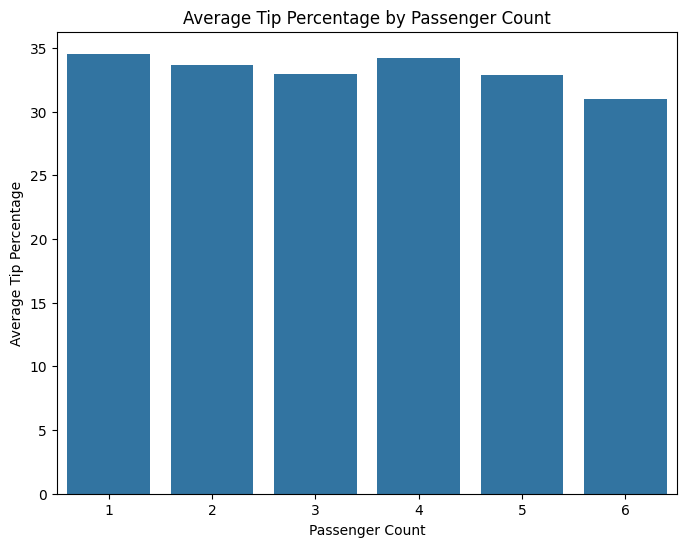

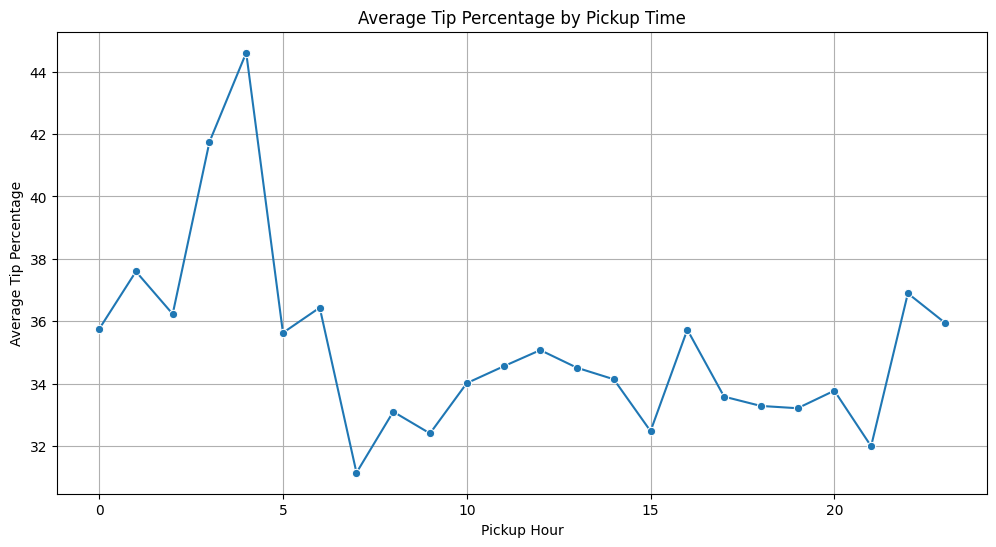

In [174]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

dfTipLessThan10Percetage=trips_and_zones[trips_and_zones['Tip_Percentage']<10]
print("---------------Analysis of various factors when Tip Percentage <10 %----------------" )
anaylseTipPercentageWithVariousFactors(dfTipLessThan10Percetage)
dfTipabove25Percetage=trips_and_zones[trips_and_zones['Tip_Percentage']>25]
print("---------------Analysis of various factors when Tip Percentage >25 %----------------" )
anaylseTipPercentageWithVariousFactors(dfTipabove25Percetage)

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

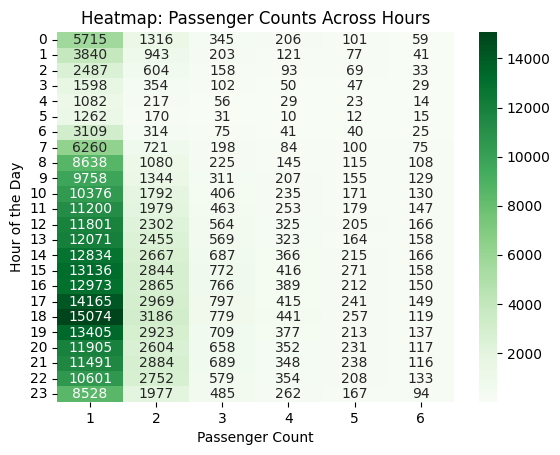

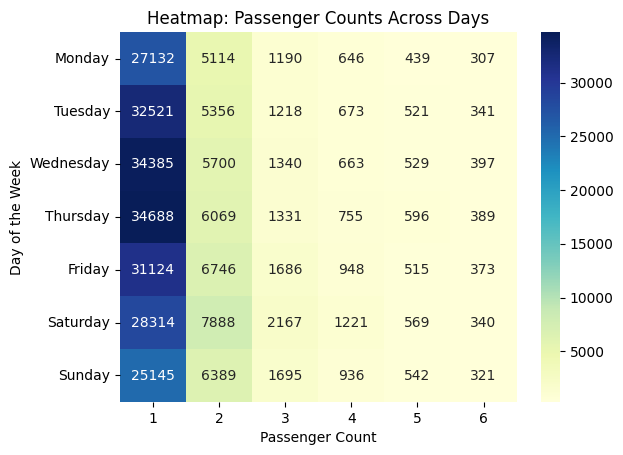

In [175]:
# See how passenger count varies across hours and days

#PassCount hour
passCounthour=trips_and_zones.groupby(['hours','Passenger_Count'])['Passenger_Count'].size().reset_index(name='TotalPassengersForThatHour')

#PassCount Days
passCountday=trips_and_zones.groupby(['DayOftheWeek','Passenger_Count'])['Passenger_Count'].size().reset_index(name='TotalPassengersForThatDay')


# Hourly Heatmap
hourly_heatmap = passCounthour.pivot(index='hours', columns='Passenger_Count', values='TotalPassengersForThatHour')
sns.heatmap(hourly_heatmap, annot=True, cmap='Greens', fmt='g')

plt.title('Heatmap: Passenger Counts Across Hours')
plt.xlabel('Passenger Count')
plt.ylabel('Hour of the Day')
plt.show()

# Daily Heatmap
daily_heatmap = passCountday.pivot(index='DayOftheWeek', columns='Passenger_Count', values='TotalPassengersForThatDay')
sns.heatmap(daily_heatmap, annot=True, cmap='YlGnBu', fmt='g')

plt.title('Heatmap: Passenger Counts Across Days')
plt.xlabel('Passenger Count')
plt.ylabel('Day of the Week')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [176]:
# How does passenger count vary across zones
trips_and_zones.columns


Index(['Vendor_Id', 'Tpep_Pickup_Datetime', 'Tpep_Dropoff_Datetime',
       'Passenger_Count', 'Trip_Distance', 'Rate_Code_Id',
       'Store_And_Fwd_Flag', 'Pu_Location_Id', 'Do_Location_Id',
       'Payment_Type', 'Fare_Amount', 'Extra', 'Mta_Tax', 'Tip_Amount',
       'Tolls_Amount', 'Improvement_Surcharge', 'Total_Amount',
       'Congestion_Surcharge', 'Airport_Fee', 'Timestamp', 'hours',
       'DayOftheWeek', 'month', 'Quarter', 'Trip_Duration',
       'Trip_Duration_Minutes', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'PickUpZone', 'LocationID_x', 'borough', 'geometry', 'day_type',
       'LocationID_y', 'DropOffZone', 'Fare_Per_Mile',
       'Fare_Per_Mile_Per_Passenger', 'Distance_Tier', 'Tip_Percentage'],
      dtype='object')

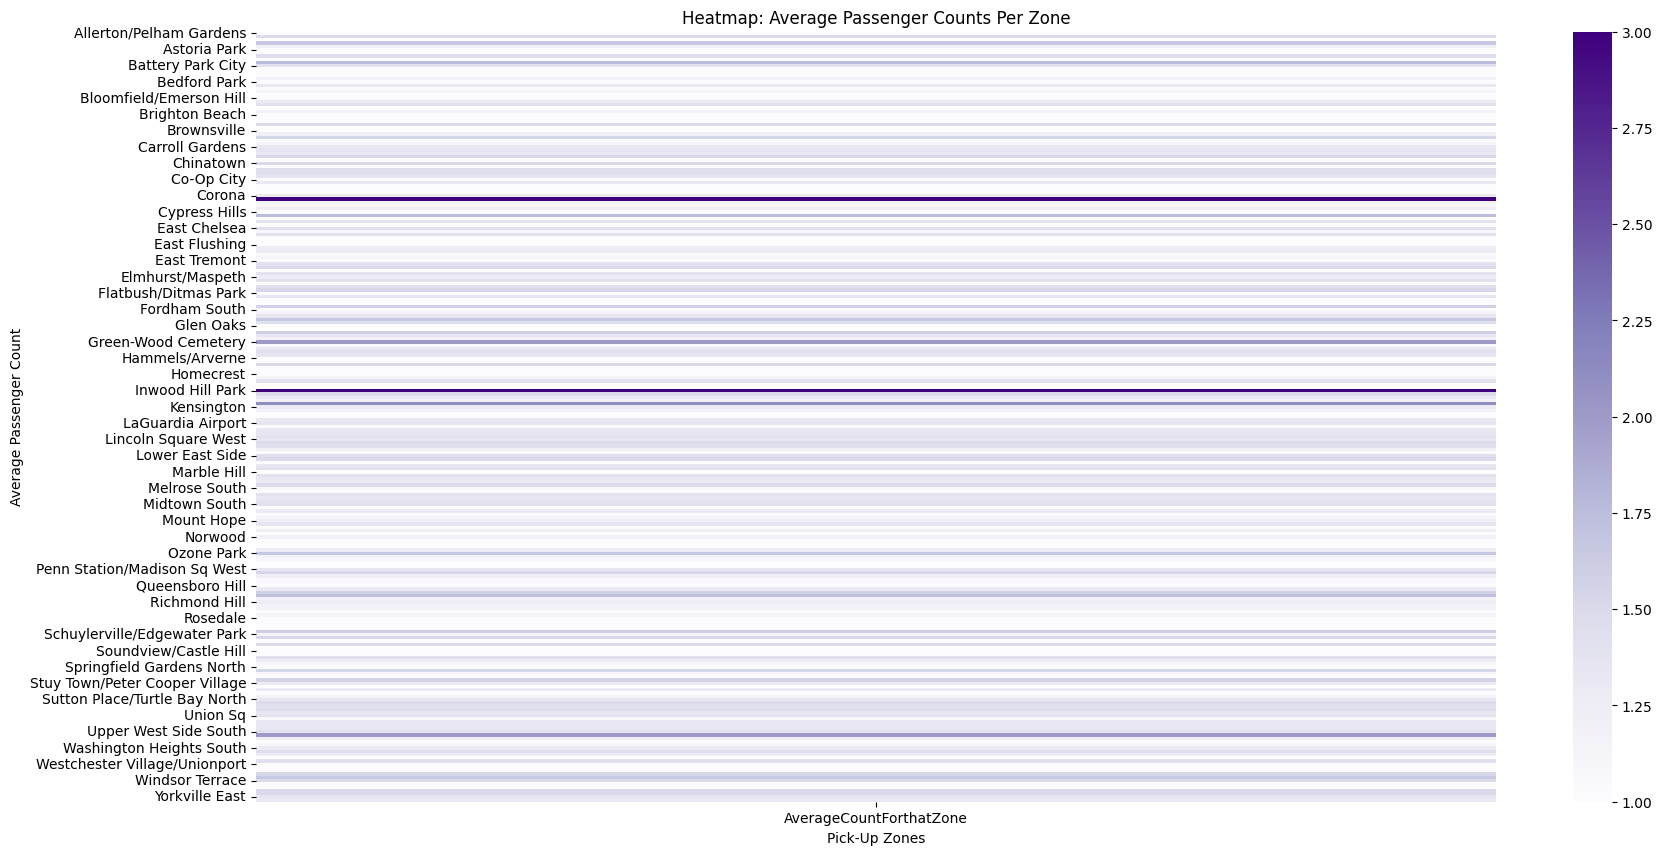

In [177]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
passCountzone = trips_and_zones.groupby(['PickUpZone'])['Passenger_Count'].mean().reset_index(name='AverageCountForthatZone')
zoneHeatMap = passCountzone.set_index('PickUpZone')[['AverageCountForthatZone']]



plt.figure(figsize=(20, 10))
sns.heatmap(zoneHeatMap, cmap='Purples', fmt='.1f')


plt.title('Heatmap: Average Passenger Counts Per Zone')
plt.xlabel('Pick-Up Zones')
plt.ylabel('Average Passenger Count')

plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

------------ Analysis of Surcharge Type Improvement_Surcharge -------------------


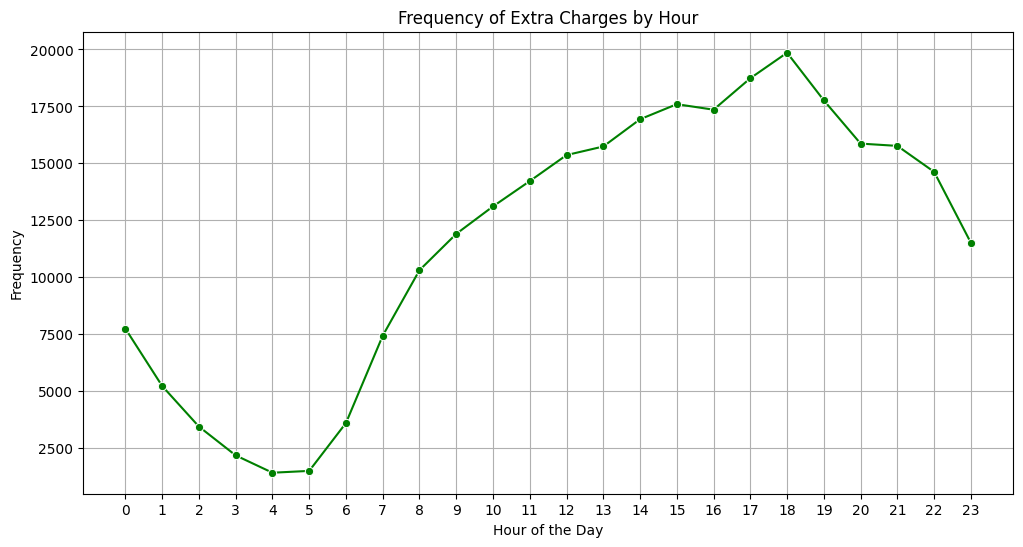

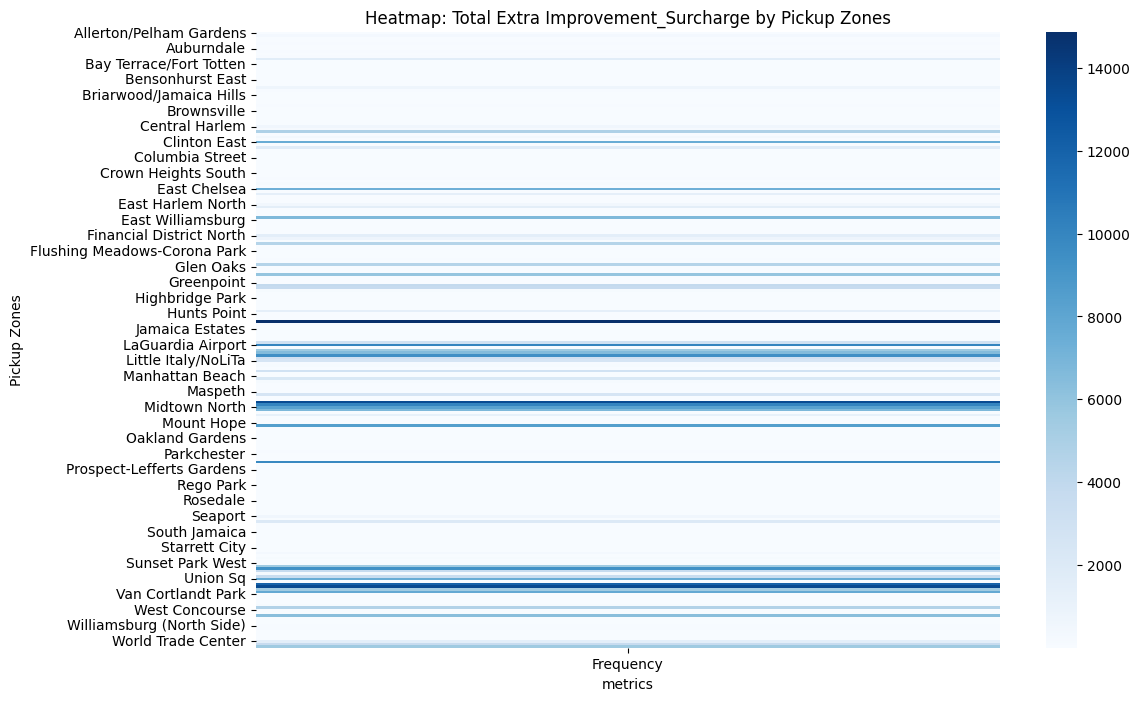

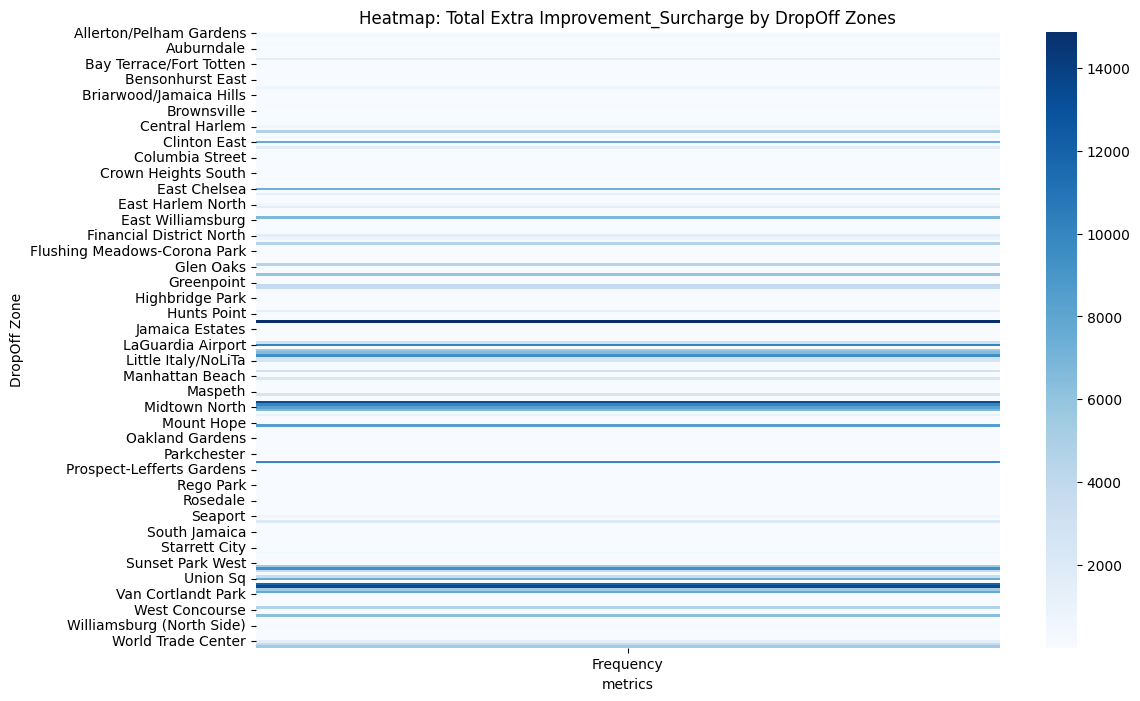

------------ Analysis of Surcharge Type Congestion_Surcharge -------------------


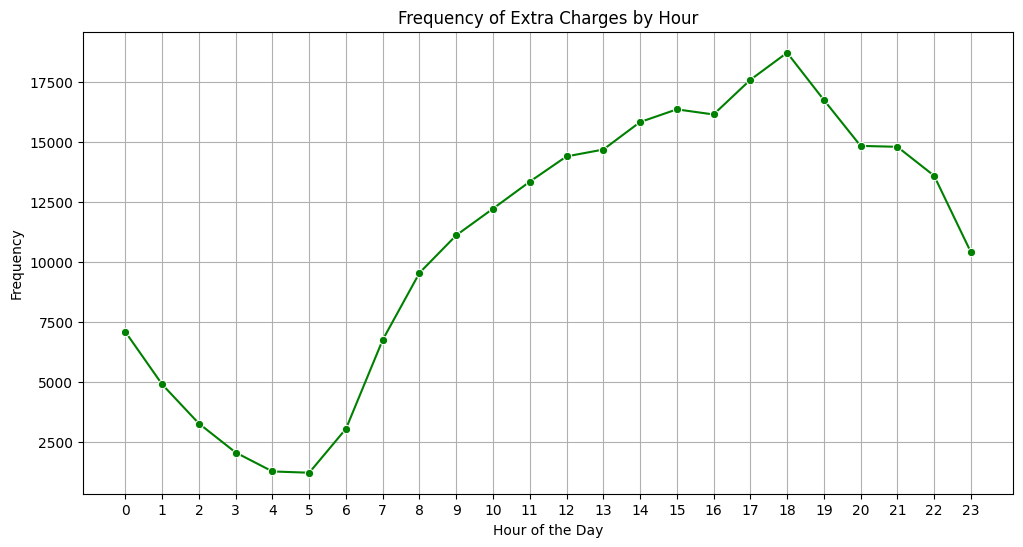

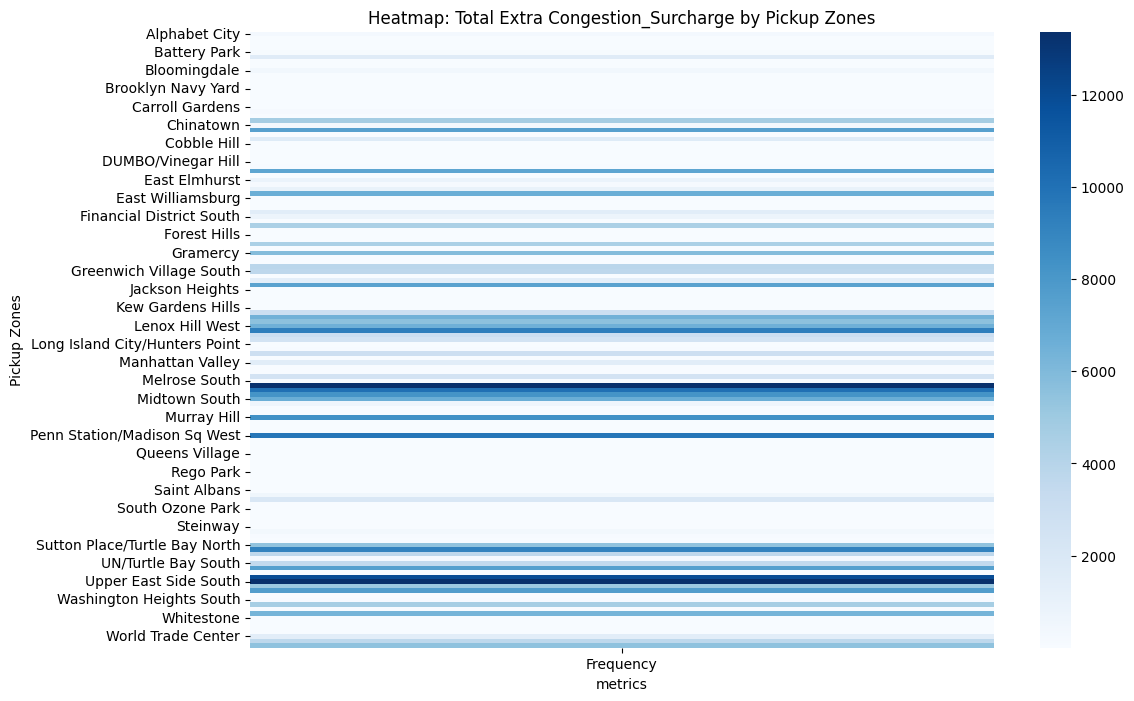

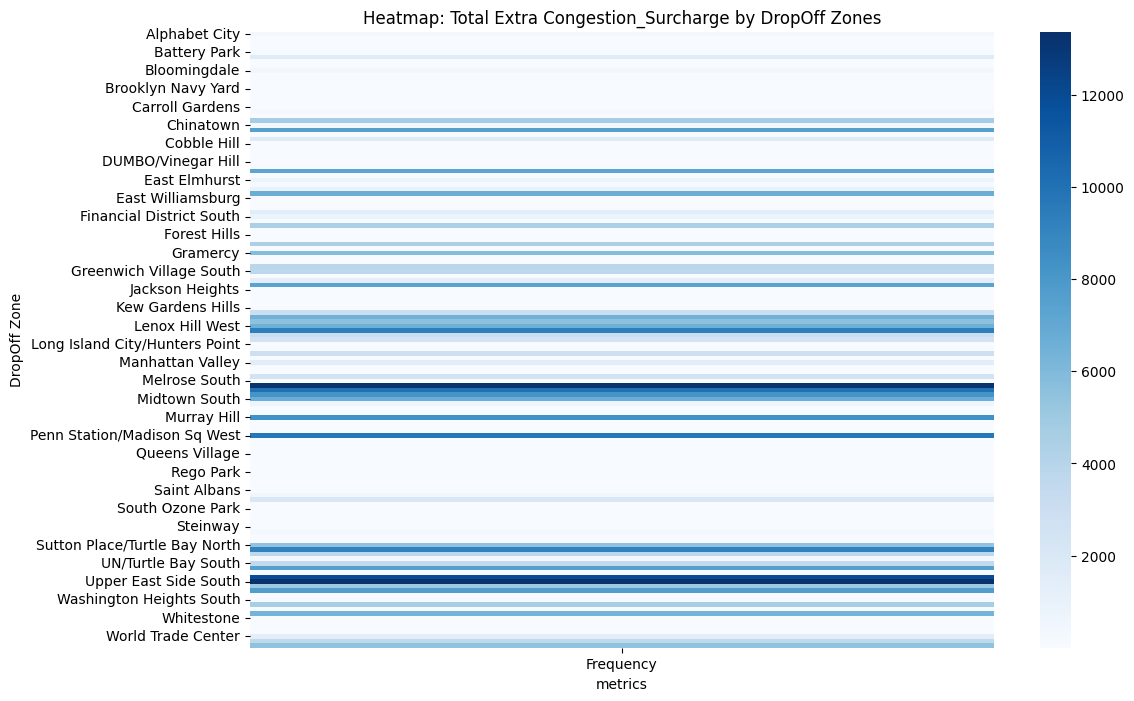

In [178]:
# How often is each surcharge applied?
trips_and_zones.columns

def analyseSurchargeType(SurchageType,data):

   print("------------ Analysis of Surcharge Type",SurchageType,"-------------------")
   ImpSur_extra_charge_trips = data[data[SurchageType] > 0]

   # Group by pickup zone
   pickup_analysis = ImpSur_extra_charge_trips.groupby('PickUpZone')[SurchageType].agg(['sum', 'count']).reset_index()
   pickup_analysis.rename(columns={'sum': 'Total'+SurchageType, 'count': 'Frequency'}, inplace=True)

   # Group by dropoff zone
   dropoff_analysis = ImpSur_extra_charge_trips.groupby('DropOffZone')[SurchageType].agg(['sum', 'count']).reset_index()
   dropoff_analysis.rename(columns={'sum': 'Total'+SurchageType, 'count': 'Frequency'}, inplace=True)


   # Group by hour
   time_analysis = ImpSur_extra_charge_trips.groupby('hours')[SurchageType].agg(['sum', 'count']).reset_index()
   time_analysis.rename(columns={'sum': 'TotalExtraCharges', 'count': 'Frequency'}, inplace=True)

   # Line chart for time analysis
   plt.figure(figsize=(12, 6))
   sns.lineplot(data=time_analysis, x='hours', y='Frequency', marker='o', color='green')
   plt.title('Frequency of Extra Charges by Hour')
   plt.xlabel('Hour of the Day')
   plt.ylabel('Frequency')
   plt.xticks(range(0, 24))
   plt.grid(True)
   plt.show()

    # Heat Map for Pick Up zone Analysis
   pickup_heatmap_data = pickup_analysis.set_index('PickUpZone')[['Frequency']]

    # Fill missing values for better visualization
   pickup_heatmap_data.fillna(0, inplace=True)

    # Plot heatmap for Pickup Zones
   plt.figure(figsize=(12, 8))
   sns.heatmap(pickup_heatmap_data, cmap='Blues', fmt='.1f')
   plt.title('Heatmap: Total Extra '+SurchageType+' by Pickup Zones')
   plt.xlabel('metrics')
   plt.ylabel('Pickup Zones')
   plt.show()


    # Heat Map for Pick DropOff zone Analysis
   dropOff_heatmap_data = dropoff_analysis.set_index('DropOffZone')[['Frequency']]
    # Fill missing values for better visualization
   dropOff_heatmap_data.fillna(0, inplace=True)

    # Plot heatmap for Pickup Zones
   plt.figure(figsize=(12, 8))
   sns.heatmap(pickup_heatmap_data, cmap='Blues', fmt='.1f')
   plt.title('Heatmap: Total Extra '+SurchageType+' by DropOff Zones')
   plt.xlabel('metrics')
   plt.ylabel('DropOff Zone')
   plt.show()
analyseSurchargeType("Improvement_Surcharge",trips_and_zones)
analyseSurchargeType("Congestion_Surcharge",trips_and_zones)



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [179]:
#--Recommend rerouting in the areas where frequent congestions are happening and hence congestion surcharges are imposed on the customers.Hence, Congestion surcharges can be avoided.
# Taxi demand is high during the morning hours from 8:00 AM to 9:00 PM so deploy more cabs during this time than in night hours.
#cabs are being utilized for upto 2 miles mostly followed by 2 to 5 miles and its quite low for more than 5 miles.
#Morning hours creates more revenue than night hours.
#For Corona,Inwood Hill park and Kensington the average person is more than 3 , its better to deploy more SUVs than Sedans.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [180]:

#Deploying more Taxis to the top 10 busiest Zones for more pick ups so that revenue can be increased instead of deploying more Taxis where drop offs are more but less pick ups
#East Elmhurst, JFK Airport,LaGuardia Airport has high pick up and drop off ratios. Deploying more Taxis here also could create good revenue during the busiest hours.
#East Elmhurst, JFK Airport,LaGuardia Airport,Greensich Village South,West Village,Lower East Side,Meat packing/West Village west and gravesend  has good ratios during mrning hours, so deploying more cabs here will create good business

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [181]:
#Vendor 2 is charging more than vendor 1 -->Negotiate with vendor 2 to reduce the charge because of the huge difference in the price range, few customers might flip to another cab service provider because of the high range.

#Pricing can be avergaed with Vendor 1 so that there can be a healthy business.
